In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd 
import random
import math
import time
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator 
plt.style.use('seaborn')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
from datetime import timedelta
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,r2_score, classification_report
import statsmodels.api as smA
import random
import matplotlib.colors as mcolors
from sklearn.tree import DecisionTreeClassifier

In [2]:
file = r"C:\Users\Mr. Jarvis\Desktop\corona virus\covid_19_data.csv"

In [3]:
file

'C:\\Users\\Mr. Jarvis\\Desktop\\corona virus\\covid_19_data.csv'

In [4]:
cv19 = pd.read_csv(file)

In [5]:
cv19

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
7009,7010,03/19/2020,NaN,Jersey,2020-03-17T18:33:03,0.0,0.0,0.0
7010,7011,03/19/2020,NaN,Puerto Rico,2020-03-17T16:13:14,0.0,0.0,0.0
7011,7012,03/19/2020,NaN,Republic of the Congo,2020-03-17T21:33:03,0.0,0.0,0.0
7012,7013,03/19/2020,NaN,The Bahamas,2020-03-19T12:13:38,0.0,0.0,0.0


In [6]:
cv19.shape

(7014, 8)

In [7]:
cv19.isnull().sum()

SNo                   0
ObservationDate       0
Province/State     2925
Country/Region        0
Last Update           0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64

In [8]:
cv19.dtypes

SNo                  int64
ObservationDate     object
Province/State      object
Country/Region      object
Last Update         object
Confirmed          float64
Deaths             float64
Recovered          float64
dtype: object

In [9]:
cv19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7014 entries, 0 to 7013
Data columns (total 8 columns):
SNo                7014 non-null int64
ObservationDate    7014 non-null object
Province/State     4089 non-null object
Country/Region     7014 non-null object
Last Update        7014 non-null object
Confirmed          7014 non-null float64
Deaths             7014 non-null float64
Recovered          7014 non-null float64
dtypes: float64(3), int64(1), object(4)
memory usage: 438.5+ KB


In [10]:
cv19.describe()

,SNo,Confirmed,Deaths,Recovered
count,7014.000000,7014.000000,7014.000000,7014.000000
mean,3507.500000,610.771600,20.435985,229.031651
std,2024.911726,4900.347776,208.405489,2596.500304
min,1.000000,0.000000,0.000000,0.000000
25%,1754.250000,2.000000,0.000000,0.000000
50%,3507.500000,13.000000,0.000000,0.000000
75%,5260.750000,112.750000,1.000000,10.000000
max,7014.000000,67800.000000,3405.000000,57682.000000


### Converting "Observation Date" into Datetime format

In [11]:
cv19["ObservationDate"] = pd.to_datetime(cv19["ObservationDate"])

In [12]:
cv19.dtypes

SNo                         int64
ObservationDate    datetime64[ns]
Province/State             object
Country/Region             object
Last Update                object
Confirmed                 float64
Deaths                    float64
Recovered                 float64
dtype: object

In [13]:
info_datewise = cv19.groupby(["ObservationDate"])[["Confirmed" , "Recovered" , "Deaths" ]].sum()

In [14]:
info_datewise

,Confirmed,Recovered,Deaths
ObservationDate,,,
2020-01-22,555.0,28.0,17.0
2020-01-23,653.0,30.0,18.0
2020-01-24,941.0,36.0,26.0
2020-01-25,1438.0,39.0,42.0
2020-01-26,2118.0,52.0,56.0
2020-01-27,2927.0,61.0,82.0
2020-01-28,5578.0,107.0,131.0
2020-01-29,6165.0,126.0,133.0
2020-01-30,8235.0,143.0,171.0


In [15]:
info_datewise = cv19.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})

### total number of country/region with the disease spread

In [16]:
len(cv19["Country/Region"])

7014

In [17]:
len(cv19["Country/Region"].unique())

184

### "Total number of Confirmed Cases"

In [18]:
info_datewise["Confirmed"].iloc[-1]

242713.0

In [19]:
info_datewise["Recovered"].iloc[-1]

84962.0

In [20]:
info_datewise["Deaths"].iloc[-1]

9867.0

In [21]:
info_countrywise = cv19.groupby([ "ObservationDate", "Country/Region"])[["Confirmed" , "Deaths" , "Recovered"]].sum()

In [22]:
info_countrywise

Confirmed  Deaths  Recovered
ObservationDate Country/Region                              
2020-01-22      Hong Kong             0.0     0.0        0.0
                Japan                 2.0     0.0        0.0
                Macau                 1.0     0.0        0.0
                Mainland China      547.0    17.0       28.0
                South Korea           1.0     0.0        0.0
...                                   ...     ...        ...
2020-03-19      Uruguay              79.0     0.0        0.0
                Uzbekistan           23.0     0.0        0.0
                Venezuela            42.0     0.0        0.0
                Vietnam              85.0     0.0       16.0
                Zambia                2.0     0.0        0.0

[3398 rows x 3 columns]

In [23]:
info_datewise.sort_values("Confirmed" , ascending=False).style.background_gradient(cmap = "Set3")

,Confirmed,Recovered,Deaths
ObservationDate,,,
2020-03-19 00:00:00,242713,84962,9867
2020-03-18 00:00:00,214915,83313,8733
2020-03-17 00:00:00,197168,80840,7905
2020-03-16 00:00:00,181546,78088,7126
2020-03-15 00:00:00,167447,76034,6440
2020-03-14 00:00:00,156099,72624,5819
2020-03-13 00:00:00,145193,70251,5404
2020-03-12 00:00:00,128343,68324,4720
2020-03-11 00:00:00,125865,67003,4615


In [24]:
info_datewise.sort_values("Confirmed" , ascending=False).style.background_gradient(cmap = "GnBu")

,Confirmed,Recovered,Deaths
ObservationDate,,,
2020-03-19 00:00:00,242713,84962,9867
2020-03-18 00:00:00,214915,83313,8733
2020-03-17 00:00:00,197168,80840,7905
2020-03-16 00:00:00,181546,78088,7126
2020-03-15 00:00:00,167447,76034,6440
2020-03-14 00:00:00,156099,72624,5819
2020-03-13 00:00:00,145193,70251,5404
2020-03-12 00:00:00,128343,68324,4720
2020-03-11 00:00:00,125865,67003,4615


Text(0.5, 1.0, 'Density Distribution Plot for Confirmed Cases')

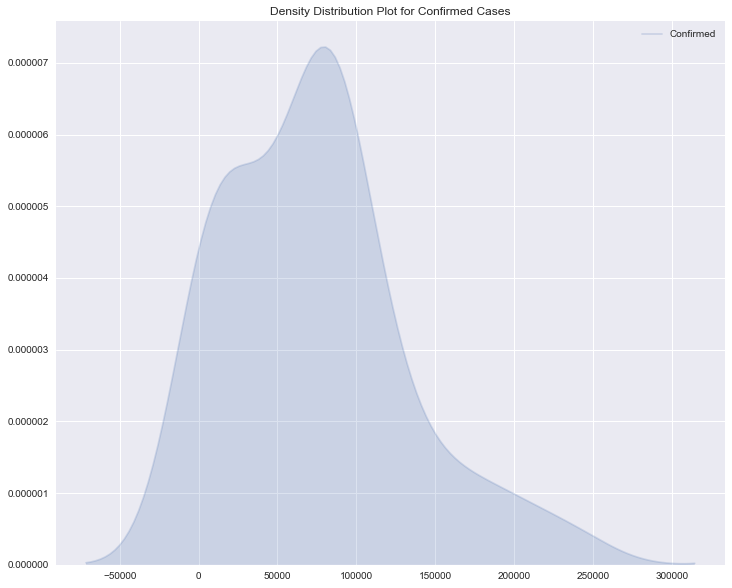

In [25]:
plt.rcParams["figure.figsize"] = (12, 10)
sns.kdeplot(info_datewise["Confirmed"] , shade=True , alpha = 0.2)
plt.title("Density Distribution Plot for Confirmed Cases")

Text(0.5, 1.0, 'Density Distribution Plot for Recovered Cases')

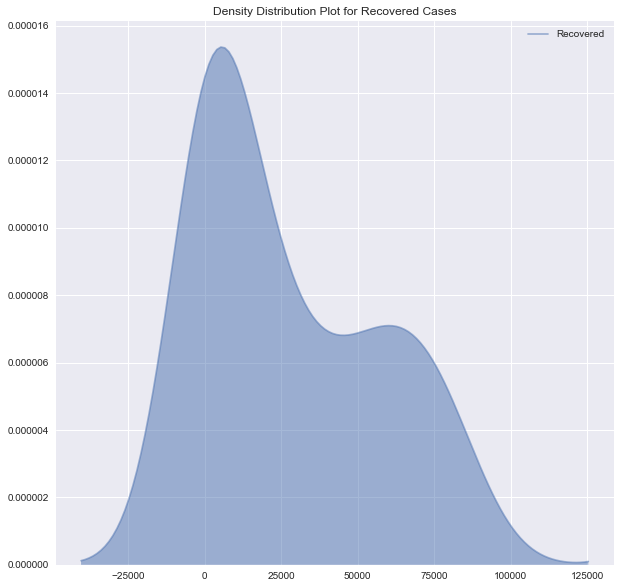

In [26]:
plt.rcParams["figure.figsize"] = (10, 10)
plt.rcParams["figure.edgecolor"] = ("black")
sns.kdeplot(info_datewise["Recovered"] , shade=True , alpha = 0.5)
plt.title("Density Distribution Plot for Recovered Cases")

Text(0.5, 1.0, 'Density Distribution Plot for Deaths Cases')

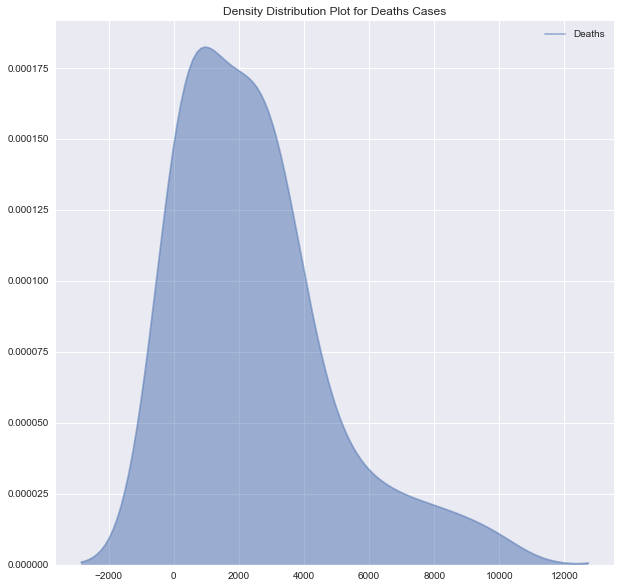

In [27]:
plt.rcParams["figure.figsize"] = (10, 10)
sns.kdeplot(info_datewise["Deaths"] , shade=True , alpha = 0.5)
plt.title("Density Distribution Plot for Deaths Cases")

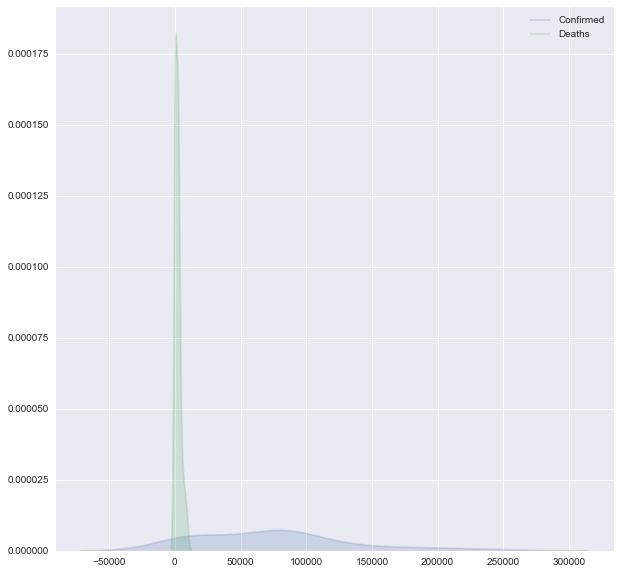

In [28]:
plt.rcParams["figure.figsize"] = (10, 10)
sns.kdeplot(info_datewise["Confirmed"] , shade=True , alpha = 0.2)
sns.kdeplot(info_datewise["Deaths"] , shade=True , alpha = 0.2)

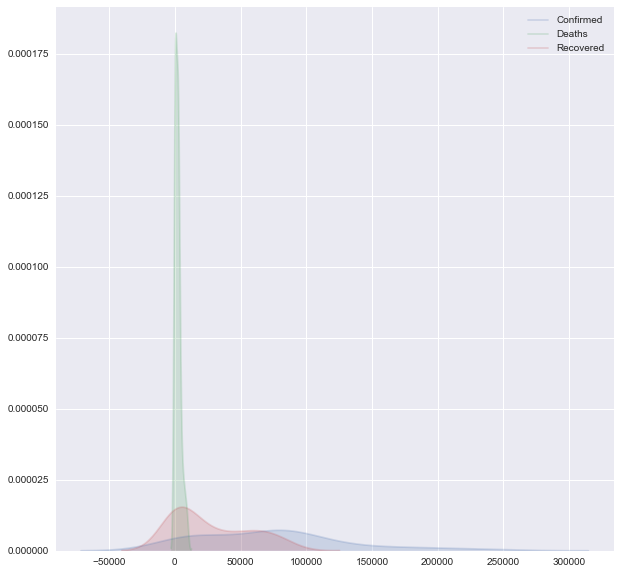

In [29]:
plt.rcParams["figure.figsize"] = (10, 10)
sns.kdeplot(info_datewise["Confirmed"] , shade=True , alpha = 0.2)
sns.kdeplot(info_datewise["Deaths"] , shade=True , alpha = 0.2)
sns.kdeplot(info_datewise["Recovered"] , shade=True , alpha = 0.2)

In [30]:
info_countrywise

Confirmed  Deaths  Recovered
ObservationDate Country/Region                              
2020-01-22      Hong Kong             0.0     0.0        0.0
                Japan                 2.0     0.0        0.0
                Macau                 1.0     0.0        0.0
                Mainland China      547.0    17.0       28.0
                South Korea           1.0     0.0        0.0
...                                   ...     ...        ...
2020-03-19      Uruguay              79.0     0.0        0.0
                Uzbekistan           23.0     0.0        0.0
                Venezuela            42.0     0.0        0.0
                Vietnam              85.0     0.0       16.0
                Zambia                2.0     0.0        0.0

[3398 rows x 3 columns]

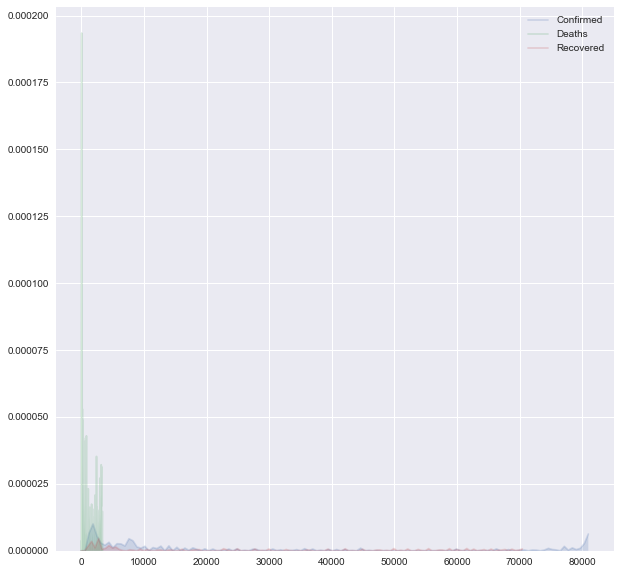

In [31]:
plt.rcParams["figure.figsize"] = (10,10)
sns.kdeplot(info_countrywise["Confirmed"] , shade=True , alpha = 0.2)
sns.kdeplot(info_countrywise["Deaths"] , shade=True , alpha = 0.2)
sns.kdeplot(info_countrywise["Recovered"] , shade=True , alpha = 0.2)

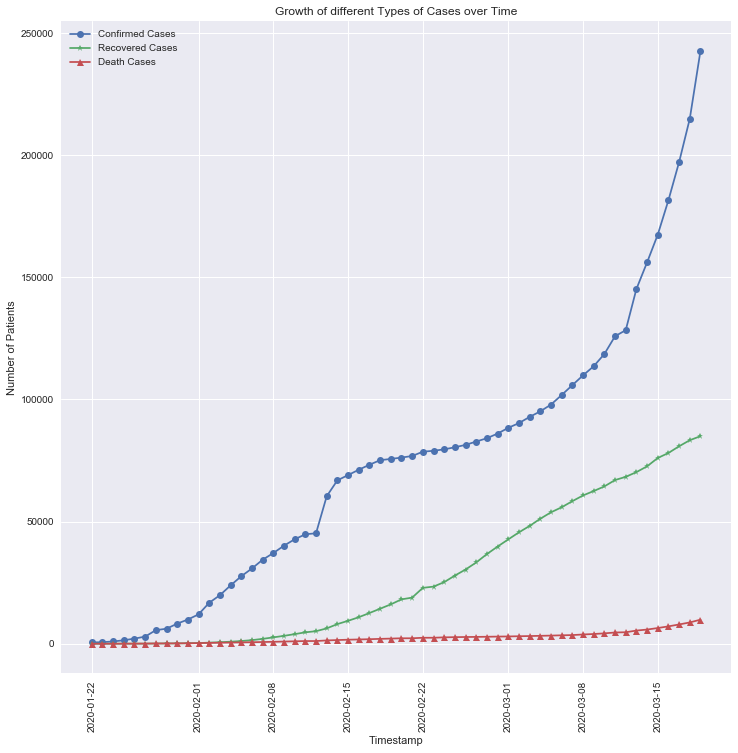

In [32]:
plt.figure(figsize=(12,12))
plt.plot(info_datewise["Confirmed"],marker="o",label="Confirmed Cases")
plt.plot(info_datewise["Recovered"],marker="*",label="Recovered Cases")
plt.plot(info_datewise["Deaths"],marker="^",label="Death Cases")
plt.ylabel("Number of Patients")
plt.xlabel("Timestamp")
plt.xticks(rotation=90)
plt.title("Growth of different Types of Cases over Time")
plt.legend()

In [33]:
info_datewise["Mortality Rate"]=(info_datewise["Deaths"]/info_datewise["Confirmed"])*100

In [34]:
info_datewise

,Confirmed,Recovered,Deaths,Mortality Rate
ObservationDate,,,,
2020-01-22,555.0,28.0,17.0,3.063063
2020-01-23,653.0,30.0,18.0,2.756508
2020-01-24,941.0,36.0,26.0,2.763018
2020-01-25,1438.0,39.0,42.0,2.920723
2020-01-26,2118.0,52.0,56.0,2.644004
2020-01-27,2927.0,61.0,82.0,2.801503
2020-01-28,5578.0,107.0,131.0,2.348512
2020-01-29,6165.0,126.0,133.0,2.157340
2020-01-30,8235.0,143.0,171.0,2.076503


In [35]:
info_datewise["Recovery Rate"]=(info_datewise["Recovered"]/info_datewise["Confirmed"])*100

In [36]:
info_datewise

,Confirmed,Recovered,Deaths,Mortality Rate,Recovery Rate
ObservationDate,,,,,
2020-01-22,555.0,28.0,17.0,3.063063,5.045045
2020-01-23,653.0,30.0,18.0,2.756508,4.594181
2020-01-24,941.0,36.0,26.0,2.763018,3.825717
2020-01-25,1438.0,39.0,42.0,2.920723,2.712100
2020-01-26,2118.0,52.0,56.0,2.644004,2.455146
2020-01-27,2927.0,61.0,82.0,2.801503,2.084045
2020-01-28,5578.0,107.0,131.0,2.348512,1.918250
2020-01-29,6165.0,126.0,133.0,2.157340,2.043796
2020-01-30,8235.0,143.0,171.0,2.076503,1.736491


In [37]:
cv19["Country/Region"] == "Mainland China" 

0        True
1        True
2        True
3        True
4        True
        ...  
7009    False
7010    False
7011    False
7012    False
7013    False
Name: Country/Region, Length: 7014, dtype: bool

### Plotting Mortality and Recovery Rate

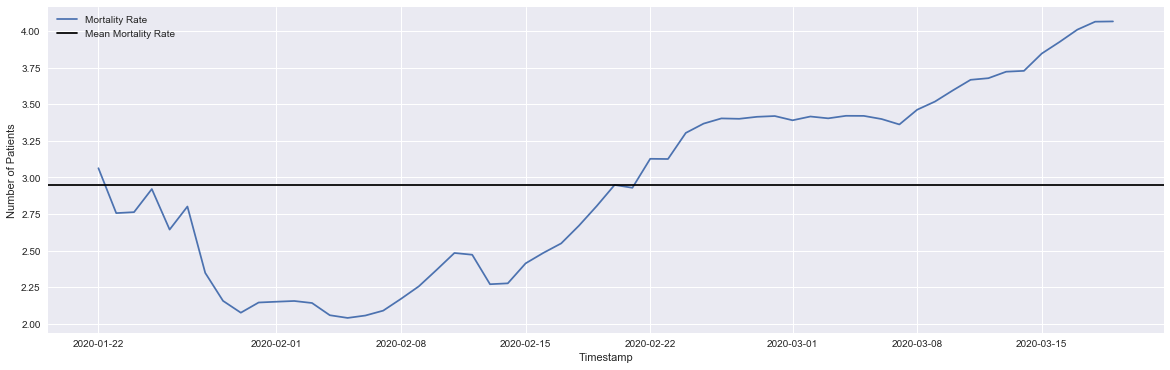

In [38]:
(fig),ax1 = plt.subplots(1,figsize=(20,6))
ax1.plot(info_datewise["Mortality Rate"],label='Mortality Rate')
ax1.axhline(info_datewise["Mortality Rate"].mean(),linestyle='-',color='black',label="Mean Mortality Rate")
ax1.set_ylabel("Number of Patients")
ax1.set_xlabel("Timestamp")
ax1.legend()

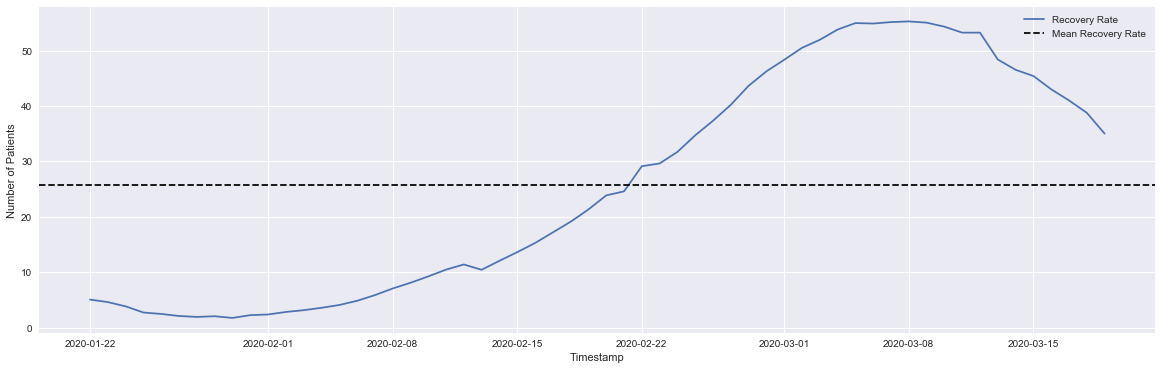

In [39]:
fig,( ax2) = plt.subplots(1,figsize=(20,6))

ax2.plot(info_datewise["Recovery Rate"],label="Recovery Rate")
ax2.axhline(info_datewise["Recovery Rate"].mean(),linestyle='--',color='black',label="Mean Recovery Rate")
ax2.set_ylabel("Number of Patients")
ax2.set_xlabel("Timestamp")
ax2.legend()

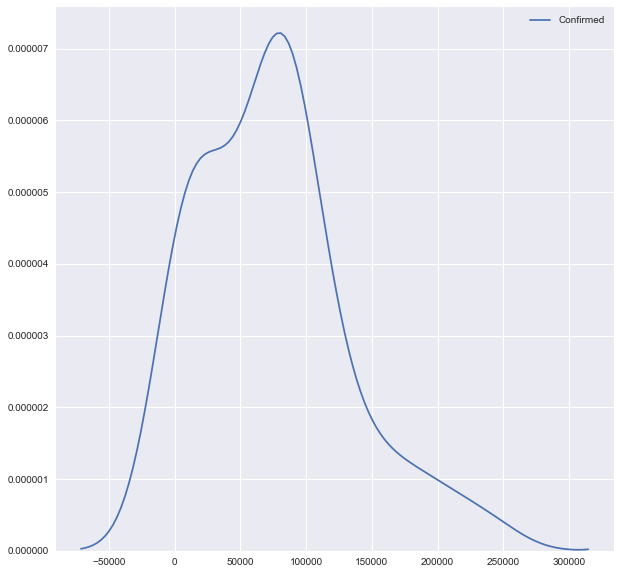

In [40]:
sns.kdeplot(info_datewise["Confirmed"])

In [41]:
info_datewise

,Confirmed,Recovered,Deaths,Mortality Rate,Recovery Rate
ObservationDate,,,,,
2020-01-22,555.0,28.0,17.0,3.063063,5.045045
2020-01-23,653.0,30.0,18.0,2.756508,4.594181
2020-01-24,941.0,36.0,26.0,2.763018,3.825717
2020-01-25,1438.0,39.0,42.0,2.920723,2.712100
2020-01-26,2118.0,52.0,56.0,2.644004,2.455146
2020-01-27,2927.0,61.0,82.0,2.801503,2.084045
2020-01-28,5578.0,107.0,131.0,2.348512,1.918250
2020-01-29,6165.0,126.0,133.0,2.157340,2.043796
2020-01-30,8235.0,143.0,171.0,2.076503,1.736491


In [42]:
info_countrywise

Confirmed  Deaths  Recovered
ObservationDate Country/Region                              
2020-01-22      Hong Kong             0.0     0.0        0.0
                Japan                 2.0     0.0        0.0
                Macau                 1.0     0.0        0.0
                Mainland China      547.0    17.0       28.0
                South Korea           1.0     0.0        0.0
...                                   ...     ...        ...
2020-03-19      Uruguay              79.0     0.0        0.0
                Uzbekistan           23.0     0.0        0.0
                Venezuela            42.0     0.0        0.0
                Vietnam              85.0     0.0       16.0
                Zambia                2.0     0.0        0.0

[3398 rows x 3 columns]

In [43]:
Report_China = info_countrywise[info_countrywise["Confirmed"] == "Mainland China"].sum()

In [44]:
Report_China

Confirmed    0.0
Deaths       0.0
Recovered    0.0
dtype: float64

In [45]:
cv19[cv19["Country/Region"] == "Mainland China"]

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
6847,6848,2020-03-19,Xinjiang,Mainland China,2020-03-11T02:18:14,76.0,3.0,73.0
6849,6850,2020-03-19,Inner Mongolia,Mainland China,2020-03-19T01:03:02,75.0,1.0,74.0
6850,6851,2020-03-19,Ningxia,Mainland China,2020-03-16T14:38:45,75.0,0.0,75.0
6903,6904,2020-03-19,Qinghai,Mainland China,2020-03-11T02:18:14,18.0,0.0,18.0


In [46]:
cv19[cv19["Country/Region"] == "Uruguay"]

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
5571,5572,2020-03-14,NaN,Uruguay,2020-03-14T16:33:03,4.0,0.0,0.0
5826,5827,2020-03-15,NaN,Uruguay,2020-03-14T16:33:03,4.0,0.0,0.0
6074,6075,2020-03-16,NaN,Uruguay,2020-03-16T14:38:45,8.0,0.0,0.0
6311,6312,2020-03-17,NaN,Uruguay,2020-03-17T02:13:54,29.0,0.0,0.0
6571,6572,2020-03-18,NaN,Uruguay,2020-03-18T11:33:04,50.0,0.0,0.0
6845,6846,2020-03-19,NaN,Uruguay,2020-03-19T02:13:17,79.0,0.0,0.0


In [47]:
cv19[cv19["Country/Region"] == "South Korea"]

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
37,38,2020-01-22,NaN,South Korea,1/22/2020 17:00,1.0,0.0,0.0
75,76,2020-01-23,NaN,South Korea,1/23/20 17:00,1.0,0.0,0.0
121,122,2020-01-24,NaN,South Korea,1/24/20 17:00,2.0,0.0,0.0
162,163,2020-01-25,NaN,South Korea,1/25/20 17:00,2.0,0.0,0.0
208,209,2020-01-26,NaN,South Korea,1/26/20 16:00,3.0,0.0,0.0
255,256,2020-01-27,NaN,South Korea,1/27/20 23:59,4.0,0.0,0.0
306,307,2020-01-28,NaN,South Korea,1/28/20 23:00,4.0,0.0,0.0
358,359,2020-01-29,NaN,South Korea,1/29/20 19:30,4.0,0.0,0.0
413,414,2020-01-30,NaN,South Korea,1/30/20 16:00,4.0,0.0,0.0
468,469,2020-01-31,NaN,South Korea,1/31/2020 23:59,11.0,0.0,0.0


In [48]:
cv19[cv19["Country/Region"] == "Pakistan"]

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
2445,2446,2020-02-26,NaN,Pakistan,2020-02-26T23:53:02,2.0,0.0,0.0
2549,2550,2020-02-27,NaN,Pakistan,2020-02-26T23:53:02,2.0,0.0,0.0
2656,2657,2020-02-28,NaN,Pakistan,2020-02-26T23:53:02,2.0,0.0,0.0
2767,2768,2020-02-29,NaN,Pakistan,2020-02-29T18:03:05,4.0,0.0,0.0
2889,2890,2020-03-01,NaN,Pakistan,2020-02-29T18:03:05,4.0,0.0,0.0
3019,3020,2020-03-02,NaN,Pakistan,2020-02-29T18:03:05,4.0,0.0,0.0
3164,3165,2020-03-03,NaN,Pakistan,2020-03-03T04:33:03,5.0,0.0,0.0
3320,3321,2020-03-04,NaN,Pakistan,2020-03-03T04:33:03,5.0,0.0,0.0
3483,3484,2020-03-05,NaN,Pakistan,2020-03-03T04:33:03,5.0,0.0,0.0
3663,3664,2020-03-06,NaN,Pakistan,2020-03-06T13:03:12,6.0,0.0,0.0


In [49]:
info_countrywise["Mortality"] = (info_countrywise["Deaths"]/info_countrywise["Confirmed"])*100

In [50]:
info_countrywise

Confirmed  Deaths  Recovered  Mortality
ObservationDate Country/Region                                         
2020-01-22      Hong Kong             0.0     0.0        0.0        NaN
                Japan                 2.0     0.0        0.0   0.000000
                Macau                 1.0     0.0        0.0   0.000000
                Mainland China      547.0    17.0       28.0   3.107861
                South Korea           1.0     0.0        0.0   0.000000
...                                   ...     ...        ...        ...
2020-03-19      Uruguay              79.0     0.0        0.0   0.000000
                Uzbekistan           23.0     0.0        0.0   0.000000
                Venezuela            42.0     0.0        0.0   0.000000
                Vietnam              85.0     0.0       16.0   0.000000
                Zambia                2.0     0.0        0.0   0.000000

[3398 rows x 4 columns]

In [51]:
info_countrywise["Recovery"] = (info_countrywise["Recovered"]/info_countrywise["Confirmed"])*100

In [52]:
info_countrywise

Confirmed  Deaths  Recovered  Mortality  \
ObservationDate Country/Region                                            
2020-01-22      Hong Kong             0.0     0.0        0.0        NaN   
                Japan                 2.0     0.0        0.0   0.000000   
                Macau                 1.0     0.0        0.0   0.000000   
                Mainland China      547.0    17.0       28.0   3.107861   
                South Korea           1.0     0.0        0.0   0.000000   
...                                   ...     ...        ...        ...   
2020-03-19      Uruguay              79.0     0.0        0.0   0.000000   
                Uzbekistan           23.0     0.0        0.0   0.000000   
                Venezuela            42.0     0.0        0.0   0.000000   
                Vietnam              85.0     0.0       16.0   0.000000   
                Zambia                2.0     0.0        0.0   0.000000   

                                 Recovery  
ObservationDate Country/Region             
2020-01-22      Hong Kong             NaN  
                Japan            0.000000  
                Macau            0.000000  
                Mainland China   5.118830  
                South Korea      0.000000  
...                                   ...  
2020-03-19      Uruguay          0.000000  
                Uzbekistan       0.000000  
                Venezuela        0.000000  
                Vietnam         18.823529  
                Zambia           0.000000  

[3398 rows x 5 columns]

## Calculating countrywise Moratality and Recovery Rate

In [53]:
countrywise = cv19[cv19["ObservationDate"] == cv19["ObservationDate"].max()].groupby(["Country/Region"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'}).sort_values(["Confirmed"],ascending=False)

In [54]:
countrywise

,Confirmed,Recovered,Deaths
Country/Region,,,
Mainland China,80931.0,70430.0,3245.0
Italy,41035.0,4440.0,3405.0
Iran,18407.0,5710.0,1284.0
Spain,17963.0,1107.0,830.0
Germany,15320.0,113.0,44.0
...,...,...,...
Guernsey,0.0,0.0,0.0
Jersey,0.0,0.0,0.0
Puerto Rico,0.0,0.0,0.0


In [55]:
countrywise.head(50)

,Confirmed,Recovered,Deaths
Country/Region,,,
Mainland China,80931.0,70430.0,3245.0
Italy,41035.0,4440.0,3405.0
Iran,18407.0,5710.0,1284.0
Spain,17963.0,1107.0,830.0
Germany,15320.0,113.0,44.0
US,13680.0,108.0,200.0
France,10886.0,12.0,243.0
South Korea,8565.0,1540.0,91.0
Switzerland,4075.0,15.0,41.0


In [56]:
countrywise["Mortality"] = (countrywise["Deaths"]/countrywise["Confirmed"])*100

In [57]:
countrywise["Recovery"] = (countrywise["Recovered"]/countrywise["Confirmed"])*100

In [58]:
countrywise

,Confirmed,Recovered,Deaths,Mortality,Recovery
Country/Region,,,,,
Mainland China,80931.0,70430.0,3245.0,4.009588,87.024749
Italy,41035.0,4440.0,3405.0,8.297795,10.820032
Iran,18407.0,5710.0,1284.0,6.975607,31.020807
Spain,17963.0,1107.0,830.0,4.620609,6.162668
Germany,15320.0,113.0,44.0,0.287206,0.737598
...,...,...,...,...,...
Guernsey,0.0,0.0,0.0,NaN,NaN
Jersey,0.0,0.0,0.0,NaN,NaN
Puerto Rico,0.0,0.0,0.0,NaN,NaN


In [59]:
info_countrywise11 = cv19.groupby(["Country/Region"])[["Confirmed" , "Deaths" , "Recovered"]].sum()

In [60]:
info_countrywise11.sort_values("Confirmed" , ascending=False)

,Confirmed,Deaths,Recovered
Country/Region,,,
Mainland China,3201186.0,106267.0,1497238.0
Italy,279084.0,19626.0,26394.0
Iran,169240.0,8450.0,49687.0
South Korea,146454.0,1139.0,8983.0
Spain,82880.0,3155.0,5505.0
...,...,...,...
The Gambia,1.0,0.0,0.0
Fiji,1.0,0.0,0.0
Nicaragua,1.0,0.0,0.0


In [61]:
cv19

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
7009,7010,2020-03-19,NaN,Jersey,2020-03-17T18:33:03,0.0,0.0,0.0
7010,7011,2020-03-19,NaN,Puerto Rico,2020-03-17T16:13:14,0.0,0.0,0.0
7011,7012,2020-03-19,NaN,Republic of the Congo,2020-03-17T21:33:03,0.0,0.0,0.0
7012,7013,2020-03-19,NaN,The Bahamas,2020-03-19T12:13:38,0.0,0.0,0.0


In [62]:

cases_of_china = cv19[cv19["Country/Region"] == "Mainland China"]

In [63]:
cases_of_china

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
6847,6848,2020-03-19,Xinjiang,Mainland China,2020-03-11T02:18:14,76.0,3.0,73.0
6849,6850,2020-03-19,Inner Mongolia,Mainland China,2020-03-19T01:03:02,75.0,1.0,74.0
6850,6851,2020-03-19,Ningxia,Mainland China,2020-03-16T14:38:45,75.0,0.0,75.0
6903,6904,2020-03-19,Qinghai,Mainland China,2020-03-11T02:18:14,18.0,0.0,18.0


In [64]:
x = cv19[cv19["Country/Region"] == "Mainland China"][["Confirmed"]].sum()

In [65]:
x

Confirmed    3201186.0
dtype: float64

In [66]:
y = cv19[cv19["Country/Region"] == "Mainland China"][["Deaths"]].sum()

In [67]:
y

Deaths    106267.0
dtype: float64

In [68]:
z = cv19[cv19["Country/Region"] == "Mainland China"][["Recovered"]].sum()

In [69]:
z

Recovered    1497238.0
dtype: float64

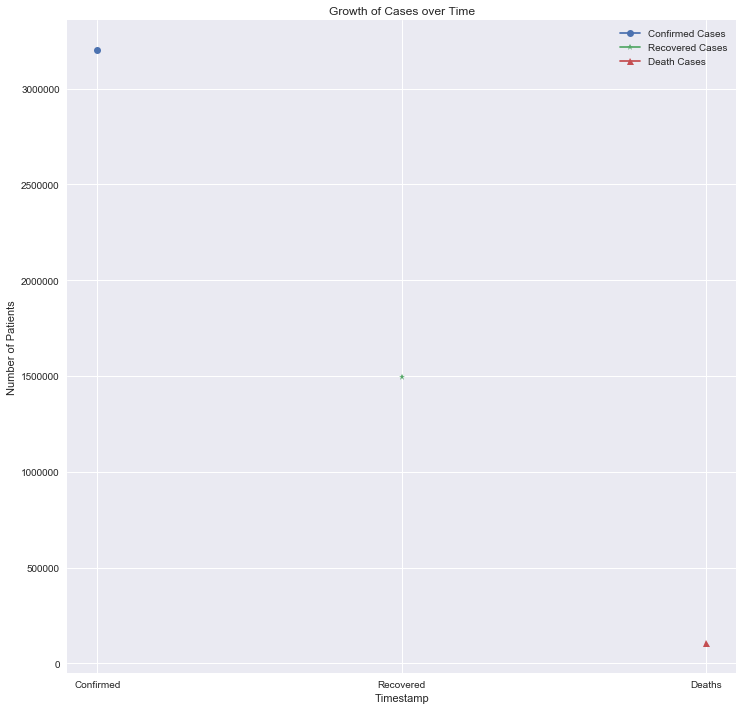

In [70]:
plt.figure(figsize=(12,12))
plt.plot(x,marker="o",label="Confirmed Cases")
plt.plot(z,marker="*",label="Recovered Cases")
plt.plot(y,marker="^",label="Death Cases")
plt.ylabel("Number of Patients")
plt.xlabel("Timestamp")

plt.title("Growth of Cases over Time")
plt.legend()

In [ ]:
country=covid19.groupby(['Country/Region'])[['Confirmed','Recovered','Deaths']].sum()
top_5=country.nlargest(5,['Confirmed'])
plt.figure(figsize=(20,16))
plt.subplot(311)
plt.title('Top 5 Countries with confirmed, recovered and death cases',fontsize=20)
plt.barh(top_5.index,top_5['Confirmed'],color='blue')
plt.yticks(fontsize=20)
plt.xlabel('Confirmed',fontsize=20)
plt.subplot(312)
plt.barh(top_5.index,top_5['Deaths'],color='red')
plt.yticks(fontsize=20)
plt.xlabel('Deaths',fontsize=20)
plt.subplot(313)
plt.barh(top_5.index,top_5['Recovered'],color='green')
plt.yticks(fontsize=20)
plt.xlabel('Recovered',fontsize=20)

In [73]:
cases_of_india = cv19[cv19["Country/Region"] == "India"]

In [74]:
cases_of_india

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
430,431,2020-01-30,NaN,India,1/30/20 16:00,1.0,0.0,0.0
491,492,2020-01-31,NaN,India,1/31/2020 23:59,1.0,0.0,0.0
547,548,2020-02-01,NaN,India,1/31/2020 8:15,1.0,0.0,0.0
607,608,2020-02-02,NaN,India,2020-02-02T06:03:08,2.0,0.0,0.0
672,673,2020-02-03,NaN,India,2020-02-03T21:43:02,3.0,0.0,0.0
740,741,2020-02-04,NaN,India,2020-02-03T21:43:02,3.0,0.0,0.0
810,811,2020-02-05,NaN,India,2020-02-03T21:43:02,3.0,0.0,0.0
881,882,2020-02-06,NaN,India,2020-02-03T21:43:02,3.0,0.0,0.0
954,955,2020-02-07,NaN,India,2020-02-03T21:43:02,3.0,0.0,0.0
1026,1027,2020-02-08,NaN,India,2020-02-03T21:43:02,3.0,0.0,0.0


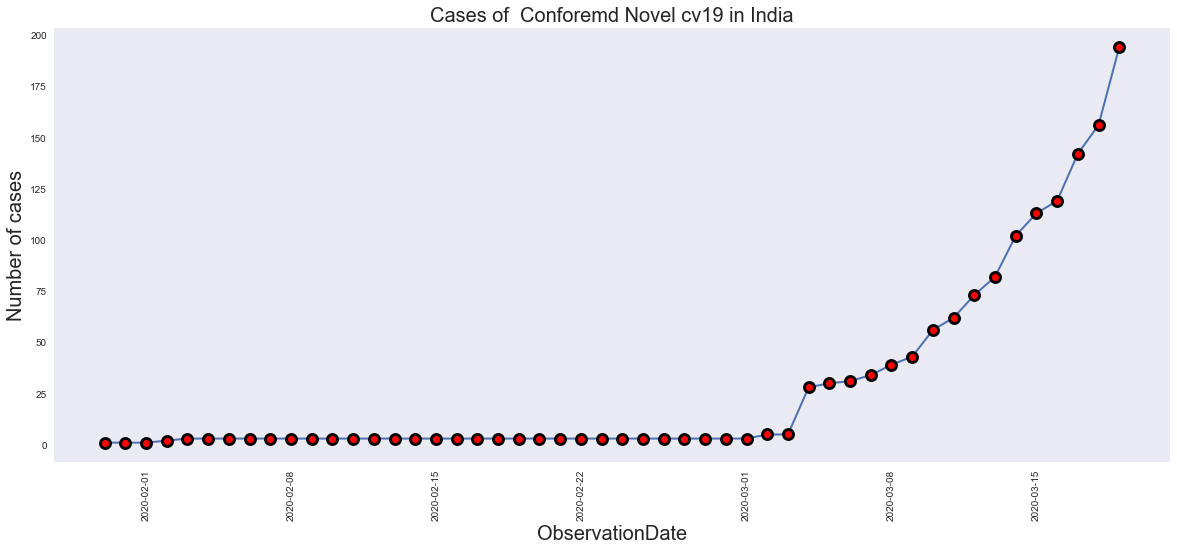

In [75]:
plt.figure(figsize=(20,8))
plt.title("Cases of  Conforemd Novel cv19 in India" , fontsize=20)

plt.ylabel("Number of cases",fontsize=20)
plt.xlabel("ObservationDate",fontsize=20)
plt.plot(cases_of_india['ObservationDate'],cases_of_india['Confirmed'],'-o',linewidth=2,markersize=10,mfc='red',mew=2.9,mec='black')
plt.xticks(rotation=90)
plt.grid()

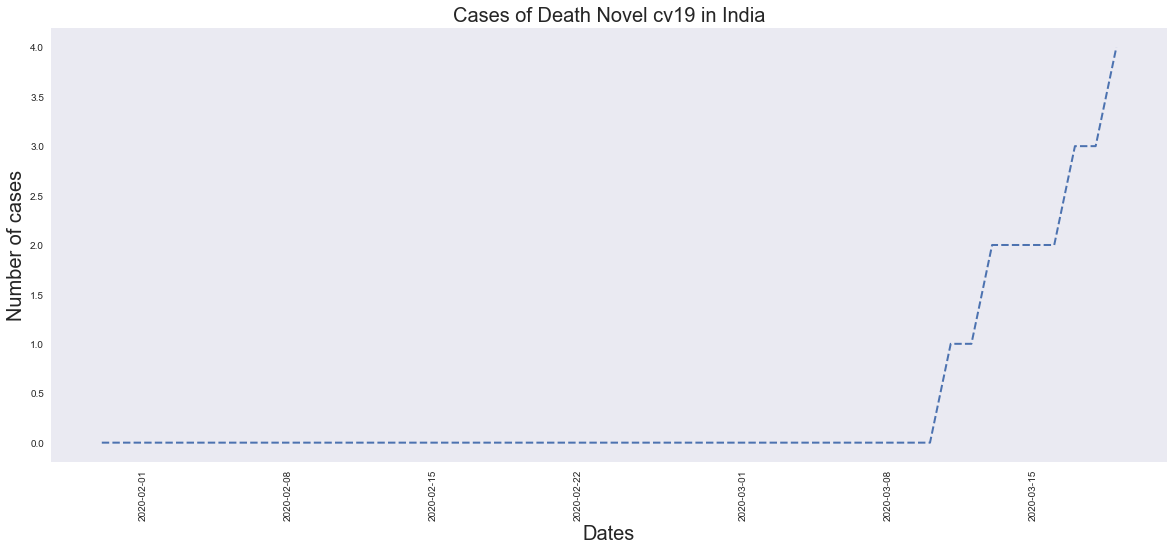

In [76]:
plt.figure(figsize=(20,8))
plt.title('Cases of Death Novel cv19 in India',fontsize=20)

plt.ylabel('Number of cases',fontsize=20)
plt.xlabel('Dates',fontsize=20)
plt.plot(cases_of_india['ObservationDate'],cases_of_india['Deaths'],'--' ,linewidth=2,markersize=10,mfc='red',mew=2.9,mec='black')
plt.xticks(rotation=90)
plt.grid()

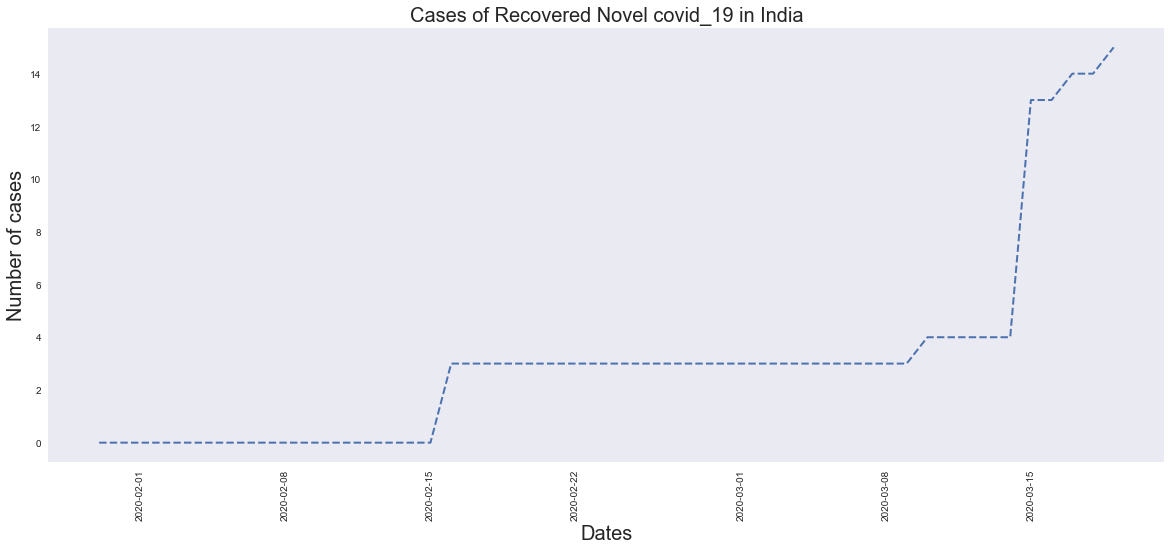

In [77]:
plt.figure(figsize=(20,8))
plt.title('Cases of Recovered Novel covid_19 in India',fontsize=20)

plt.ylabel('Number of cases',fontsize=20)
plt.xlabel('Dates',fontsize=20)
plt.plot(cases_of_india['ObservationDate'],cases_of_india["Recovered"],'--',linewidth=2,markersize=10,mfc='red',mew=2.9,mec='black')
plt.xticks(rotation=90)
plt.grid()

In [78]:
cases_of_china

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
6847,6848,2020-03-19,Xinjiang,Mainland China,2020-03-11T02:18:14,76.0,3.0,73.0
6849,6850,2020-03-19,Inner Mongolia,Mainland China,2020-03-19T01:03:02,75.0,1.0,74.0
6850,6851,2020-03-19,Ningxia,Mainland China,2020-03-16T14:38:45,75.0,0.0,75.0
6903,6904,2020-03-19,Qinghai,Mainland China,2020-03-11T02:18:14,18.0,0.0,18.0


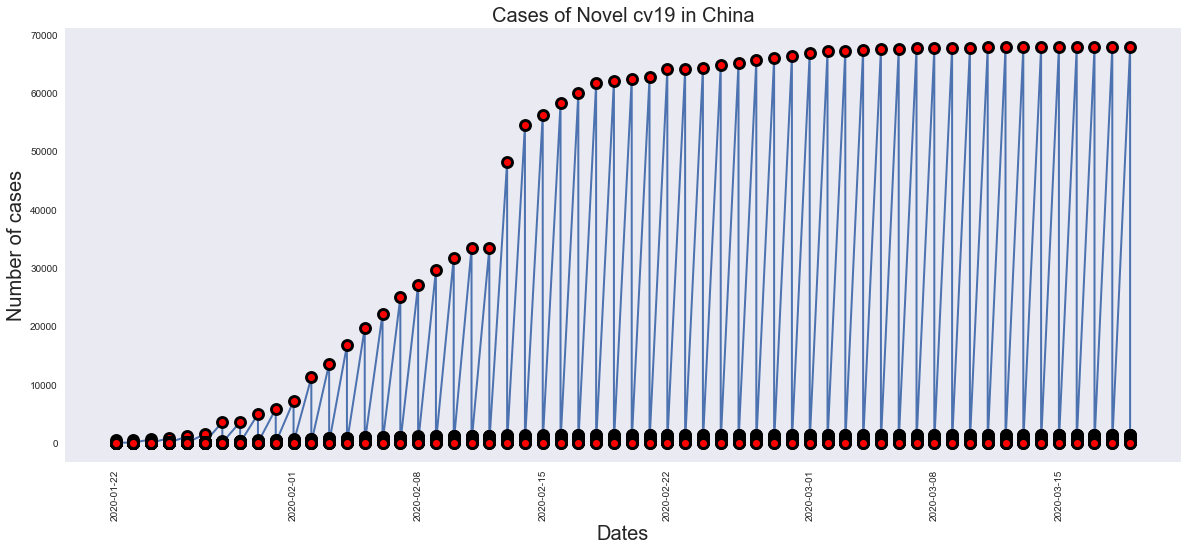

In [79]:
plt.figure(figsize=(20,8))
plt.title('Cases of Novel cv19 in China',fontsize=20)

plt.ylabel('Number of cases',fontsize=20)
plt.xlabel('Dates',fontsize=20)
plt.plot(cases_of_china['ObservationDate'],cases_of_china['Confirmed'],'-o',linewidth=2,markersize=10,mfc='red',mew=2.9,mec='black')
plt.xticks(rotation=90)
plt.grid()

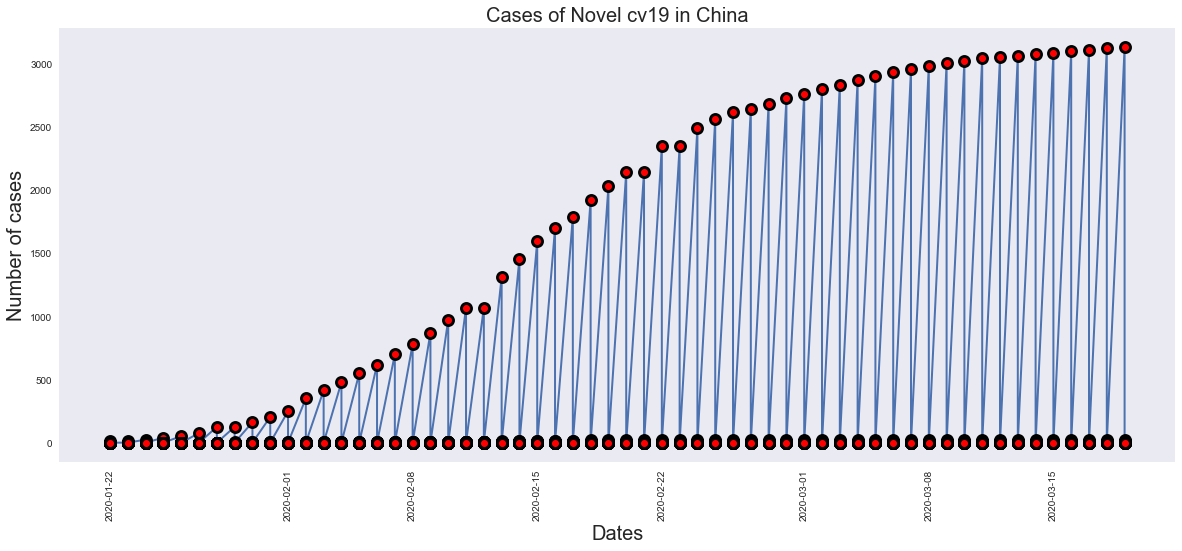

In [80]:
plt.figure(figsize=(20,8))
plt.title('Cases of Novel cv19 in China',fontsize=20)

plt.ylabel('Number of cases',fontsize=20)
plt.xlabel('Dates',fontsize=20)
plt.plot(cases_of_china['ObservationDate'],cases_of_china['Deaths'],'-o',linewidth=2,markersize=10,mfc='red',mew=2.9,mec='black')
plt.xticks(rotation=90)
plt.grid()

No handles with labels found to put in legend.


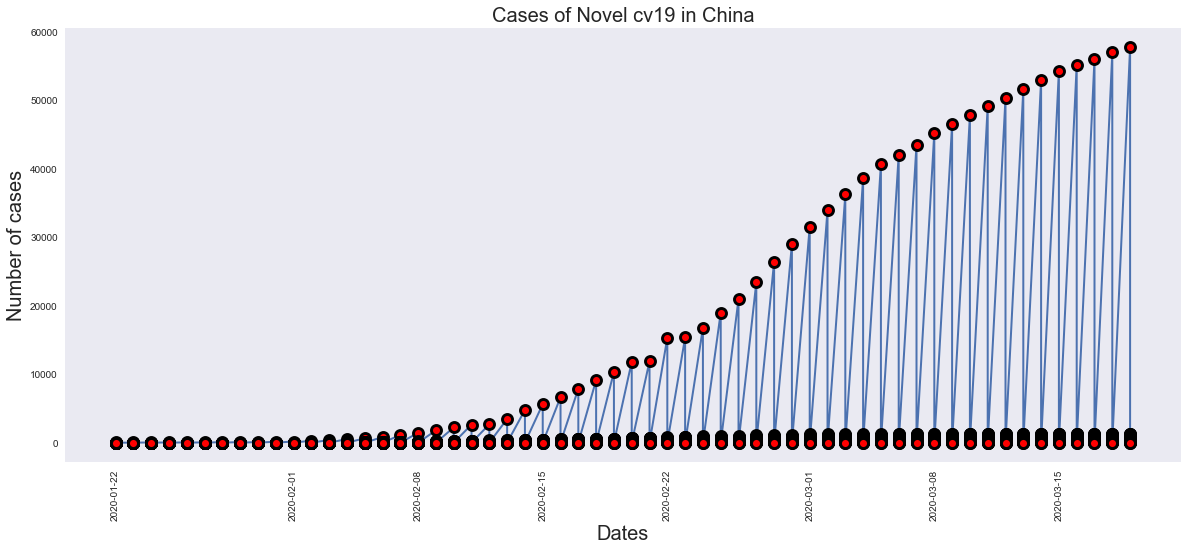

In [81]:
plt.figure(figsize=(20,8))
plt.title('Cases of Novel cv19 in China',fontsize=20)

plt.ylabel('Number of cases',fontsize=20)
plt.xlabel('Dates',fontsize=20)
plt.plot(cases_of_china['ObservationDate'],cases_of_china['Recovered'],'-o',linewidth=2,markersize=10,mfc='red',mew=2.9,mec='black')
plt.xticks(rotation=90)
plt.grid()
plt.legend()

In [82]:
cv19[cv19["Country/Region"] == "India"][["Confirmed"]].sum()

Confirmed    1403.0
dtype: float64

In [83]:
cv19[cv19["Country/Region"] == "India"][["Recovered"]].sum()

Recovered    158.0
dtype: float64

In [84]:
cv19[cv19["Country/Region"] == "India"][["Deaths"]].sum()

Deaths    20.0
dtype: float64

In [85]:
countrywise_data = cv19[cv19["ObservationDate"] == cv19["ObservationDate"].max()].groupby(["Country/Region"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'}).sort_values(["Confirmed"],ascending=False)

In [86]:
countrywise_data

,Confirmed,Recovered,Deaths
Country/Region,,,
Mainland China,80931.0,70430.0,3245.0
Italy,41035.0,4440.0,3405.0
Iran,18407.0,5710.0,1284.0
Spain,17963.0,1107.0,830.0
Germany,15320.0,113.0,44.0
...,...,...,...
Guernsey,0.0,0.0,0.0
Jersey,0.0,0.0,0.0
Puerto Rico,0.0,0.0,0.0


In [87]:
top_5_infected_country = countrywise_data.nlargest(5,['Confirmed'])

In [88]:
top_5_infected_country

,Confirmed,Recovered,Deaths
Country/Region,,,
Mainland China,80931.0,70430.0,3245.0
Italy,41035.0,4440.0,3405.0
Iran,18407.0,5710.0,1284.0
Spain,17963.0,1107.0,830.0
Germany,15320.0,113.0,44.0


Text(0.5, 0, 'Confirmed')

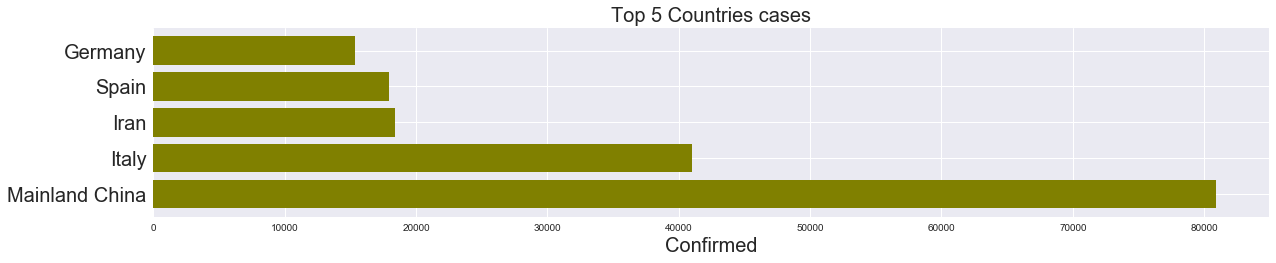

In [89]:
plt.figure(figsize=(20,16))
plt.subplot(411)
plt.title('Top 5 Countries cases',fontsize=20)
plt.barh(top_5_infected_country.index,top_5_infected_country['Confirmed'],color='olive')
plt.yticks(fontsize=20)
plt.xlabel('Confirmed',fontsize=20)

Text(0.5, 1.0, 'Top 5 Countries cases of Deaths')

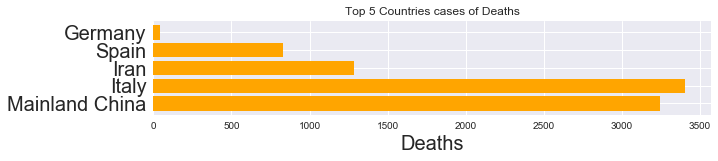

In [90]:
plt.figure(figsize=(10,10))
plt.subplot(512)
plt.barh(top_5_infected_country.index,top_5_infected_country['Deaths'],color='orange')
plt.yticks(fontsize=20)
plt.xlabel('Deaths',fontsize=20)
plt.title("Top 5 Countries cases of Deaths")

Text(0.5, 0, 'Recovered')

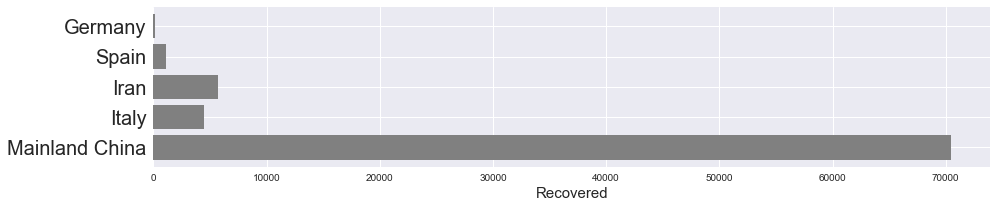

In [91]:
plt.figure(figsize=(15,10))
plt.title("Top 5 Countries cases of Recovered")
plt.subplot(313)
plt.barh(top_5_infected_country.index,top_5_infected_country['Recovered'],color='Grey')
plt.yticks(fontsize=20)
plt.xlabel("Recovered" , fontsize=15)

In [92]:
least_5_infected_country = countrywise_data.nsmallest(5,['Confirmed'])

In [93]:
least_5_infected_country

,Confirmed,Recovered,Deaths
Country/Region,,,
The Gambia,0.0,0.0,0.0
The Bahamas,0.0,0.0,0.0
Guam,0.0,0.0,0.0
Guernsey,0.0,0.0,0.0
Jersey,0.0,0.0,0.0


([0, 1, 2, 3, 4], <a list of 5 Text yticklabel objects>)

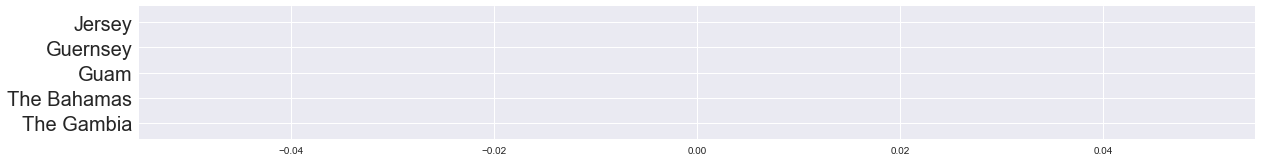

In [94]:
plt.figure(figsize=(20,20))
plt.title("least 5 Countries cases")
plt.subplot(713)
plt.barh(least_5_infected_country.index,least_5_infected_country["Confirmed"],color='Grey')
plt.yticks(fontsize=20)

In [95]:
countrywise

,Confirmed,Recovered,Deaths,Mortality,Recovery
Country/Region,,,,,
Mainland China,80931.0,70430.0,3245.0,4.009588,87.024749
Italy,41035.0,4440.0,3405.0,8.297795,10.820032
Iran,18407.0,5710.0,1284.0,6.975607,31.020807
Spain,17963.0,1107.0,830.0,4.620609,6.162668
Germany,15320.0,113.0,44.0,0.287206,0.737598
...,...,...,...,...,...
Guernsey,0.0,0.0,0.0,NaN,NaN
Jersey,0.0,0.0,0.0,NaN,NaN
Puerto Rico,0.0,0.0,0.0,NaN,NaN


In [96]:
countrywise_data

,Confirmed,Recovered,Deaths
Country/Region,,,
Mainland China,80931.0,70430.0,3245.0
Italy,41035.0,4440.0,3405.0
Iran,18407.0,5710.0,1284.0
Spain,17963.0,1107.0,830.0
Germany,15320.0,113.0,44.0
...,...,...,...
Guernsey,0.0,0.0,0.0
Jersey,0.0,0.0,0.0
Puerto Rico,0.0,0.0,0.0


## no recovered country

In [97]:
no_recovered_countries = countrywise[(countrywise["Confirmed"]>50)&(countrywise["Recovered"]==0)][["Confirmed","Deaths","Recovered"]]

In [98]:
no_recovered_countries

,Confirmed,Deaths,Recovered
Country/Region,,,
Luxembourg,335.0,4.0,0.0
Slovenia,286.0,1.0,0.0
Chile,238.0,0.0,0.0
Ecuador,199.0,3.0,0.0
Turkey,192.0,3.0,0.0
South Africa,150.0,0.0,0.0
Slovakia,123.0,1.0,0.0
Panama,109.0,1.0,0.0
Bulgaria,94.0,3.0,0.0


In [99]:
no_recovered_countries["Mortality Rate"] = (no_recovered_countries["Deaths"]/no_recovered_countries["Confirmed"])*100

In [100]:
no_recovered_countries

,Confirmed,Deaths,Recovered,Mortality Rate
Country/Region,,,,
Luxembourg,335.0,4.0,0.0,1.194030
Slovenia,286.0,1.0,0.0,0.349650
Chile,238.0,0.0,0.0,0.000000
Ecuador,199.0,3.0,0.0,1.507538
Turkey,192.0,3.0,0.0,1.562500
South Africa,150.0,0.0,0.0,0.000000
Slovakia,123.0,1.0,0.0,0.813008
Panama,109.0,1.0,0.0,0.917431
Bulgaria,94.0,3.0,0.0,3.191489


In [101]:
no_recovered_countries[no_recovered_countries["Mortality Rate"]>0].sort_values(["Confirmed"] , ascending = False )

,Confirmed,Deaths,Recovered,Mortality Rate
Country/Region,,,,
Luxembourg,335.0,4.0,0.0,1.194030
Slovenia,286.0,1.0,0.0,0.349650
Ecuador,199.0,3.0,0.0,1.507538
Turkey,192.0,3.0,0.0,1.562500
Slovakia,123.0,1.0,0.0,0.813008
Panama,109.0,1.0,0.0,0.917431
Bulgaria,94.0,3.0,0.0,3.191489
Costa Rica,69.0,1.0,0.0,1.449275
Albania,64.0,2.0,0.0,3.125000


Text(0.5, 0, 'Confirmed')

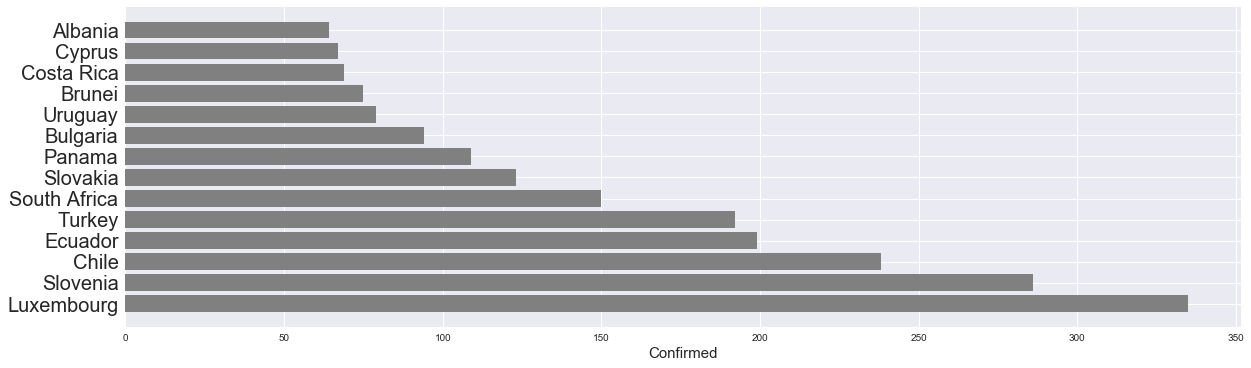

In [102]:
plt.figure(figsize=(20,20))
plt.title("No Recovered country")
plt.subplot(313)
plt.barh(no_recovered_countries.index,no_recovered_countries['Confirmed'],color='Grey')
plt.yticks(fontsize=20)
plt.xlabel("Confirmed" , fontsize=15)

Text(0.5, 0, 'Deaths')

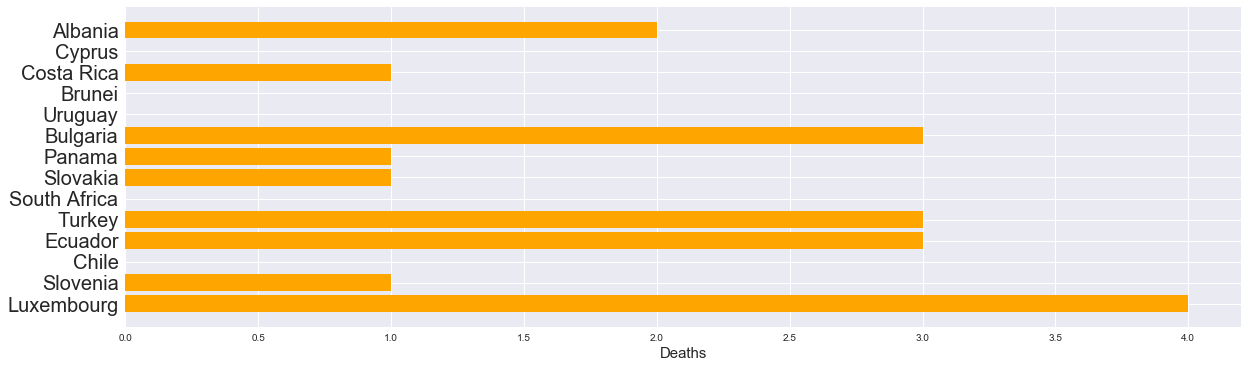

In [103]:
plt.figure(figsize=(20,20))
plt.title("No Recovered country")
plt.subplot(313)
plt.barh(no_recovered_countries.index,no_recovered_countries['Deaths'],color='orange')
plt.yticks(fontsize=20)
plt.xlabel("Deaths" , fontsize=15)

In [104]:
cv19[cv19["Country/Region"] == "India"].sum()

SNo                                                          134385
Province/State                                                    0
Country/Region    IndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaI...
Last Update       1/30/20 16:001/31/2020 23:591/31/2020 8:152020...
Confirmed                                                      1403
Deaths                                                           20
Recovered                                                       158
dtype: object

## Countries with more than 100 Confirmed Cases and No Deaths with considerably high Recovery Rate

In [105]:
no_deaths_occured = countrywise[(countrywise["Confirmed"]>100)&(countrywise["Deaths"]==0)]

In [106]:
no_deaths_occured

,Confirmed,Recovered,Deaths,Mortality,Recovery
Country/Region,,,,,
Czech Republic,694.0,3.0,0.0,0.0,0.432277
Israel,677.0,11.0,0.0,0.0,1.624815
Qatar,460.0,4.0,0.0,0.0,0.869565
Finland,400.0,10.0,0.0,0.0,2.500000
Singapore,345.0,114.0,0.0,0.0,33.043478
Romania,277.0,25.0,0.0,0.0,9.025271
Saudi Arabia,274.0,6.0,0.0,0.0,2.189781
Estonia,267.0,1.0,0.0,0.0,0.374532
Chile,238.0,0.0,0.0,0.0,0.000000


In [107]:
no_deaths_occured[no_deaths_occured["Recovery"]>0].sort_values(["Recovery"],ascending=False)

,Confirmed,Recovered,Deaths,Mortality,Recovery
Country/Region,,,,,
Singapore,345.0,114.0,0.0,0.0,33.043478
United Arab Emirates,140.0,31.0,0.0,0.0,22.142857
Kuwait,148.0,18.0,0.0,0.0,12.162162
Romania,277.0,25.0,0.0,0.0,9.025271
Finland,400.0,10.0,0.0,0.0,2.500000
Saudi Arabia,274.0,6.0,0.0,0.0,2.189781
Israel,677.0,11.0,0.0,0.0,1.624815
Colombia,102.0,1.0,0.0,0.0,0.980392
Serbia,103.0,1.0,0.0,0.0,0.970874


Text(0.5, 0, 'No Deaths')

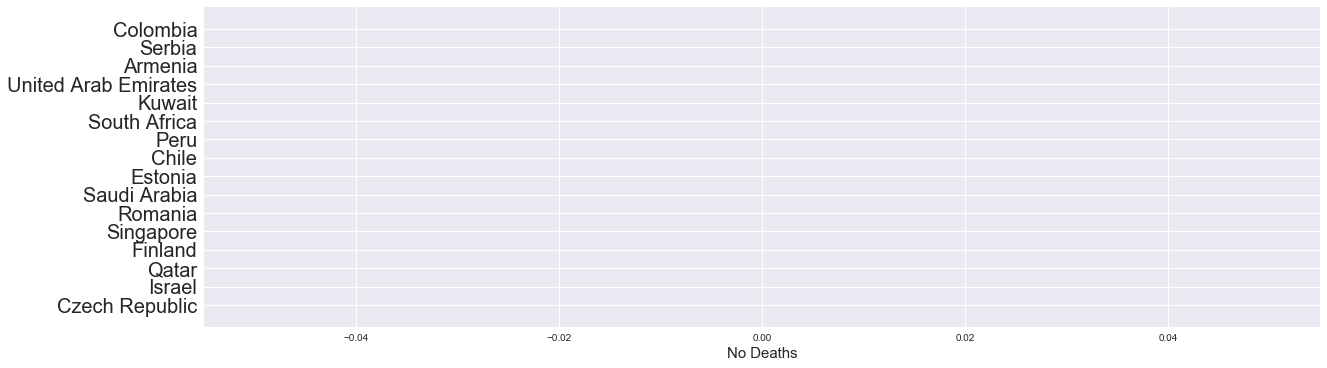

In [108]:
plt.figure(figsize=(20,20))
plt.title("Countries with more than 100 Confirmed Cases and No Deaths with considerably high Recovery Rate")
plt.subplot(313)
plt.barh(no_deaths_occured.index,no_deaths_occured['Deaths'],color='purple')
plt.yticks(fontsize=20)
plt.xlabel("No Deaths" , fontsize=15)

Text(0.5, 0, 'Recovered')

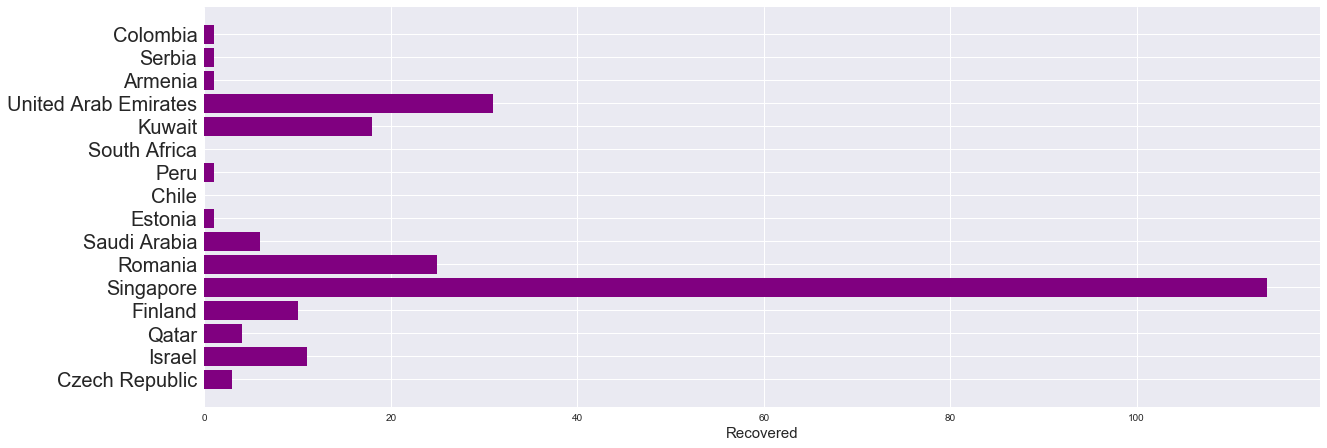

In [109]:
plt.figure(figsize=(20,25))
plt.title("Countries with more than 100 Confirmed Cases and No Deaths with considerably high Recovery Rate")
plt.subplot(313)
plt.barh(no_deaths_occured.index,no_deaths_occured['Recovered'],color='purple')
plt.yticks(fontsize=20)
plt.xlabel("Recovered" , fontsize=15)

In [110]:
cases_of_china

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
6847,6848,2020-03-19,Xinjiang,Mainland China,2020-03-11T02:18:14,76.0,3.0,73.0
6849,6850,2020-03-19,Inner Mongolia,Mainland China,2020-03-19T01:03:02,75.0,1.0,74.0
6850,6851,2020-03-19,Ningxia,Mainland China,2020-03-16T14:38:45,75.0,0.0,75.0
6903,6904,2020-03-19,Qinghai,Mainland China,2020-03-11T02:18:14,18.0,0.0,18.0


In [111]:
china_data_info = cv19[cv19["Country/Region"] == "Mainland China"] 

In [112]:
china_data_info

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
6847,6848,2020-03-19,Xinjiang,Mainland China,2020-03-11T02:18:14,76.0,3.0,73.0
6849,6850,2020-03-19,Inner Mongolia,Mainland China,2020-03-19T01:03:02,75.0,1.0,74.0
6850,6851,2020-03-19,Ningxia,Mainland China,2020-03-16T14:38:45,75.0,0.0,75.0
6903,6904,2020-03-19,Qinghai,Mainland China,2020-03-11T02:18:14,18.0,0.0,18.0


In [113]:
Italy_data_info = cv19[cv19["Country/Region"] == "Italy"]

In [114]:
Italy_data_info

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
480,481,2020-01-31,NaN,Italy,1/31/2020 23:59,2.0,0.0,0.0
539,540,2020-02-01,NaN,Italy,1/31/2020 8:15,2.0,0.0,0.0
608,609,2020-02-02,NaN,Italy,2020-01-31T08:15:53,2.0,0.0,0.0
675,676,2020-02-03,NaN,Italy,2020-01-31T08:15:53,2.0,0.0,0.0
743,744,2020-02-04,NaN,Italy,2020-01-31T08:15:53,2.0,0.0,0.0
814,815,2020-02-05,NaN,Italy,2020-01-31T08:15:53,2.0,0.0,0.0
885,886,2020-02-06,NaN,Italy,2020-01-31T08:15:53,2.0,0.0,0.0
955,956,2020-02-07,NaN,Italy,2020-02-07T17:53:02,3.0,0.0,0.0
1027,1028,2020-02-08,NaN,Italy,2020-02-07T17:53:02,3.0,0.0,0.0
1099,1100,2020-02-09,NaN,Italy,2020-02-07T17:53:02,3.0,0.0,0.0


In [115]:
data_of_the_rest_Of_the_world = cv19[(cv19["Country/Region"] != "Mainland China") & (cv19["Country/Region"] != "Italy")]

In [116]:
data_of_the_rest_Of_the_world

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
12,13,2020-01-22,Hong Kong,Hong Kong,1/22/2020 17:00,0.0,0.0,0.0
20,21,2020-01-22,Macau,Macau,1/22/2020 17:00,1.0,0.0,0.0
28,29,2020-01-22,Taiwan,Taiwan,1/22/2020 17:00,1.0,0.0,0.0
31,32,2020-01-22,Washington,US,1/22/2020 17:00,1.0,0.0,0.0
35,36,2020-01-22,NaN,Japan,1/22/2020 17:00,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...
7009,7010,2020-03-19,NaN,Jersey,2020-03-17T18:33:03,0.0,0.0,0.0
7010,7011,2020-03-19,NaN,Puerto Rico,2020-03-17T16:13:14,0.0,0.0,0.0
7011,7012,2020-03-19,NaN,Republic of the Congo,2020-03-17T21:33:03,0.0,0.0,0.0
7012,7013,2020-03-19,NaN,The Bahamas,2020-03-19T12:13:38,0.0,0.0,0.0


In [117]:
info_datewise_china = china_data_info.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})

In [118]:
info_datewise_china

,Confirmed,Recovered,Deaths
ObservationDate,,,
2020-01-22,547.0,28.0,17.0
2020-01-23,639.0,30.0,18.0
2020-01-24,916.0,36.0,26.0
2020-01-25,1399.0,39.0,42.0
2020-01-26,2062.0,49.0,56.0
2020-01-27,2863.0,58.0,82.0
2020-01-28,5494.0,101.0,131.0
2020-01-29,6070.0,120.0,133.0
2020-01-30,8124.0,135.0,171.0


In [119]:
info_datewise_itly = Italy_data_info.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})

In [120]:
info_datewise_itly

,Confirmed,Recovered,Deaths
ObservationDate,,,
2020-01-31,2.0,0.0,0.0
2020-02-01,2.0,0.0,0.0
2020-02-02,2.0,0.0,0.0
2020-02-03,2.0,0.0,0.0
2020-02-04,2.0,0.0,0.0
2020-02-05,2.0,0.0,0.0
2020-02-06,2.0,0.0,0.0
2020-02-07,3.0,0.0,0.0
2020-02-08,3.0,0.0,0.0


In [121]:
info_data_of_the_rest_Of_the_world = data_of_the_rest_Of_the_world.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})

In [122]:
info_data_of_the_rest_Of_the_world

,Confirmed,Recovered,Deaths
ObservationDate,,,
2020-01-22,8.0,0.0,0.0
2020-01-23,14.0,0.0,0.0
2020-01-24,25.0,0.0,0.0
2020-01-25,39.0,0.0,0.0
2020-01-26,56.0,3.0,0.0
2020-01-27,64.0,3.0,0.0
2020-01-28,84.0,6.0,0.0
2020-01-29,95.0,6.0,0.0
2020-01-30,111.0,8.0,0.0


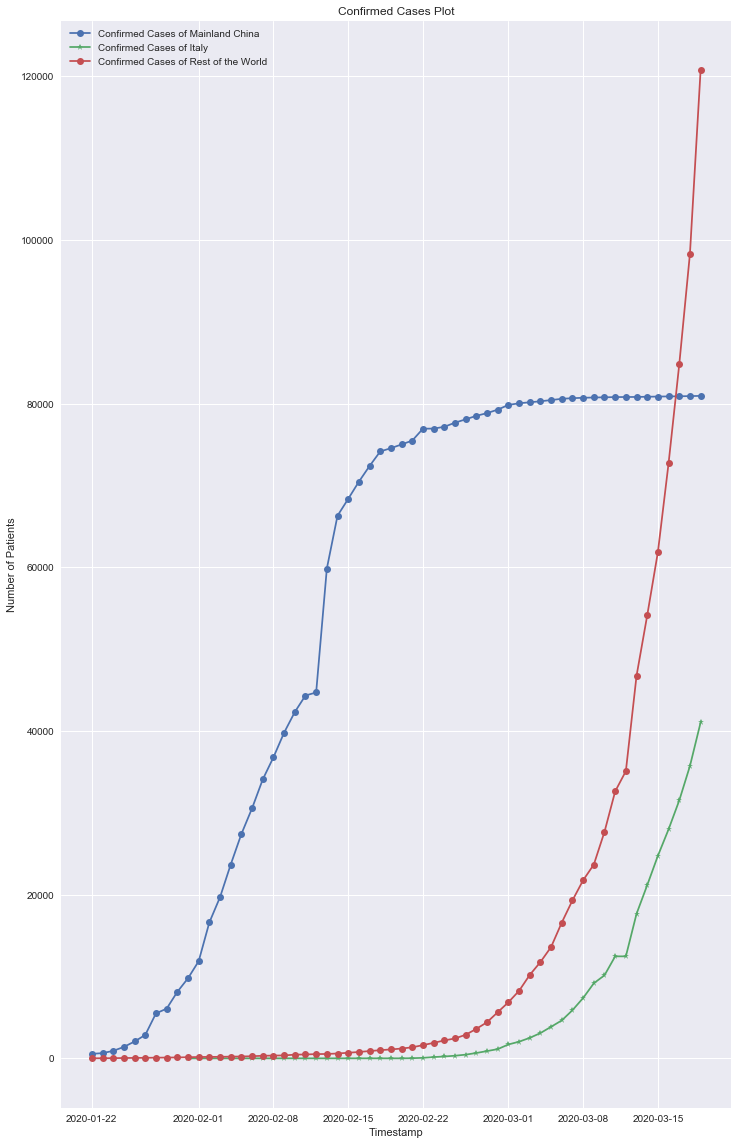

In [123]:
fig, (ax1) = plt.subplots(1,figsize=(12,20))
ax1.plot(info_datewise_china["Confirmed"],label="Confirmed Cases of Mainland China",marker='o')
ax1.plot(info_datewise_itly["Confirmed"],label="Confirmed Cases of Italy",marker='*')
ax1.plot(info_data_of_the_rest_Of_the_world["Confirmed"],label="Confirmed Cases of Rest of the World",marker='o')
ax1.set_title("Confirmed Cases Plot")
ax1.set_ylabel("Number of Patients")
ax1.set_xlabel("Timestamp")
ax1.legend()

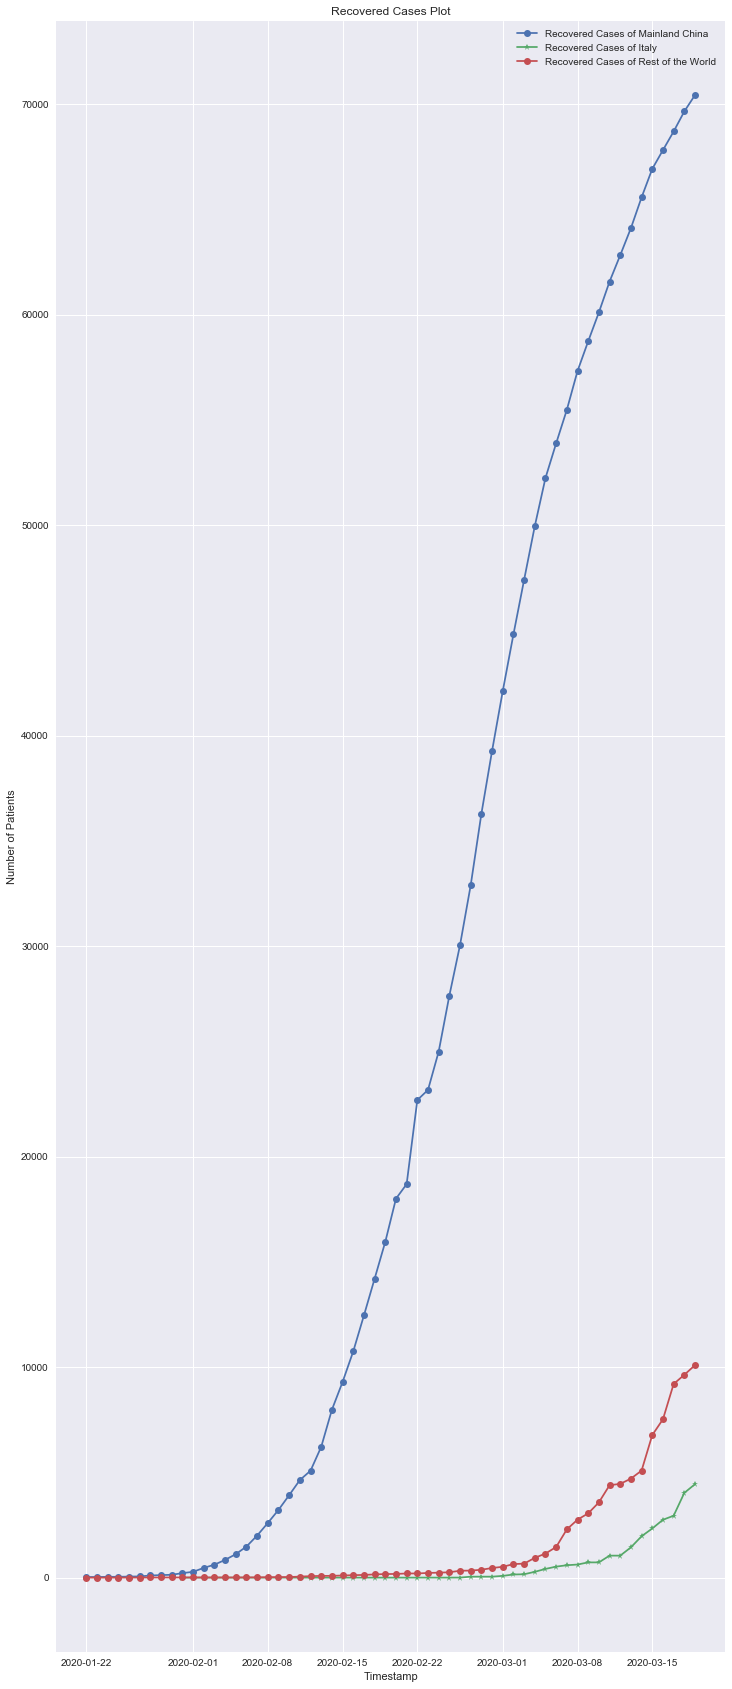

In [124]:
fig, ( ax2) = plt.subplots( 1,figsize=(12,30))
ax2.plot(info_datewise_china["Recovered"],label="Recovered Cases of Mainland China",marker='o')
ax2.plot(info_datewise_itly["Recovered"],label="Recovered Cases of Italy",marker='*')
ax2.plot(info_data_of_the_rest_Of_the_world["Recovered"],label="Recovered Cases of Rest of the World",marker='o')
ax2.set_title("Recovered Cases Plot")
ax2.set_ylabel("Number of Patients")
ax2.set_xlabel("Timestamp")
ax2.legend()

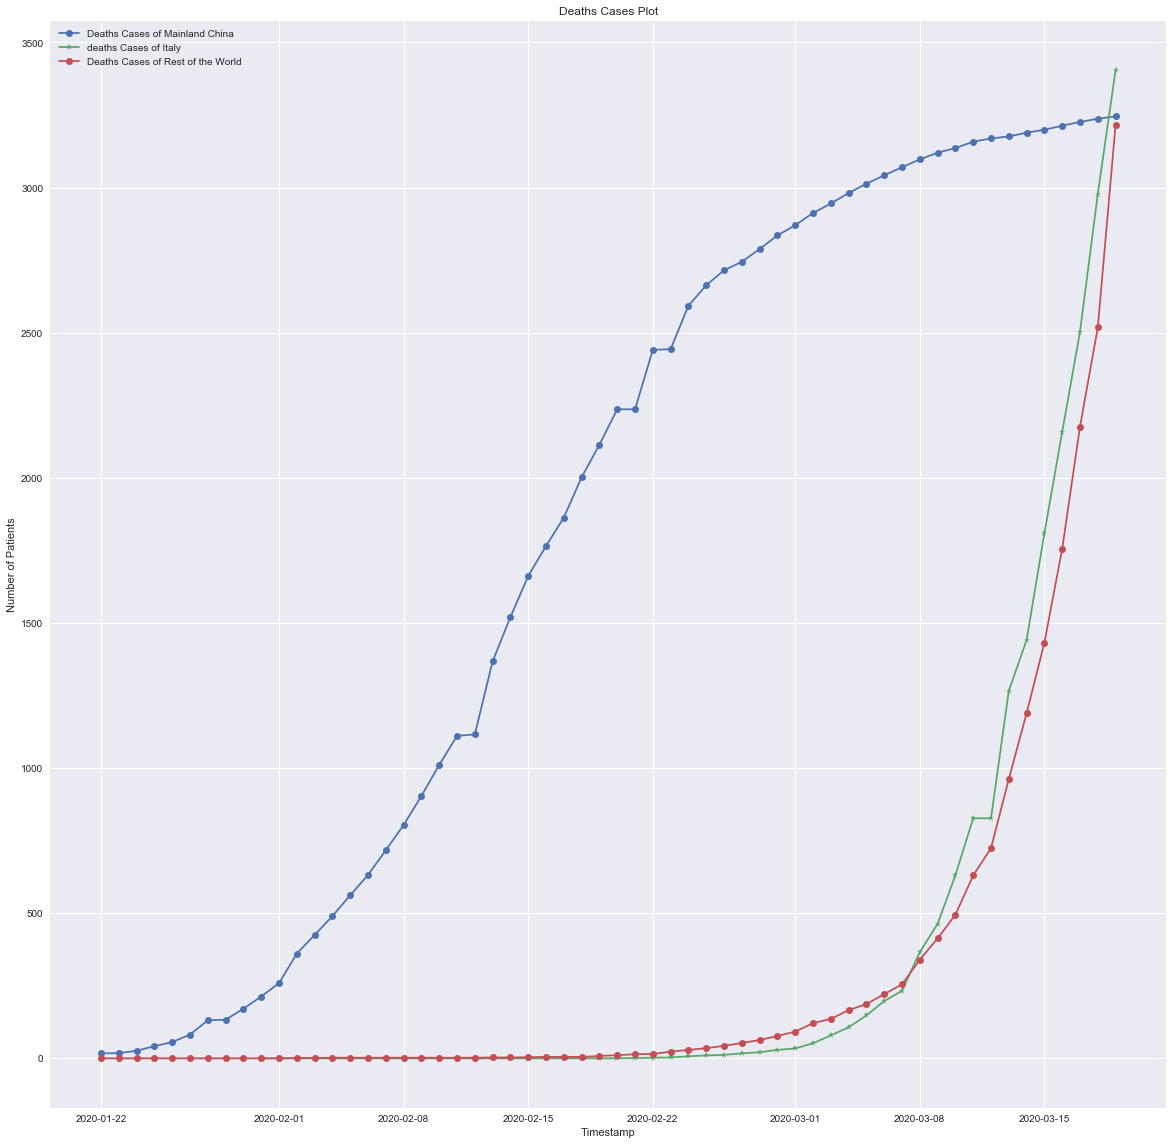

In [125]:
fig, ( ax3) = plt.subplots( 1,figsize=(20,20))
ax3.plot(info_datewise_china["Deaths"],label="Deaths Cases of Mainland China",marker='o')
ax3.plot(info_datewise_itly["Deaths"],label="deaths Cases of Italy",marker='*')
ax3.plot(info_data_of_the_rest_Of_the_world["Deaths"],label="Deaths Cases of Rest of the World",marker='o')
ax3.set_title("Deaths Cases Plot")
ax3.set_ylabel("Number of Patients")
ax3.set_xlabel("Timestamp")
ax3.legend()

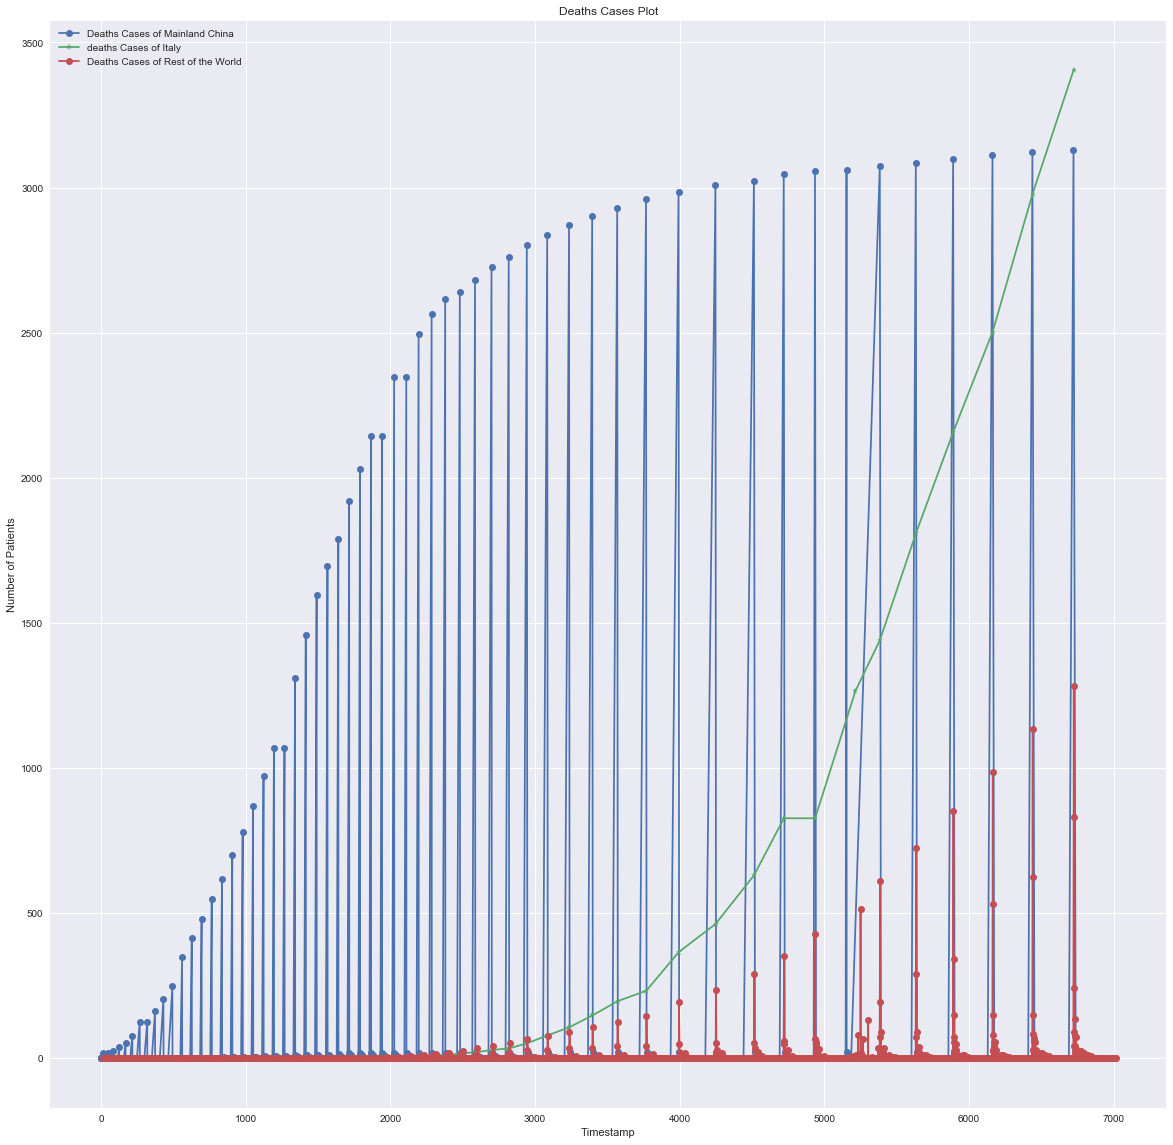

In [126]:
fig, ( ax3) = plt.subplots( 1,figsize=(20,20))
ax3.plot(china_data_info["Deaths"],label="Deaths Cases of Mainland China",marker='o')
ax3.plot(Italy_data_info["Deaths"],label="deaths Cases of Italy",marker='*')
ax3.plot(data_of_the_rest_Of_the_world["Deaths"],label="Deaths Cases of Rest of the World",marker='o')
ax3.set_title("Deaths Cases Plot")
ax3.set_ylabel("Number of Patients")
ax3.set_xlabel("Timestamp")
ax3.legend()

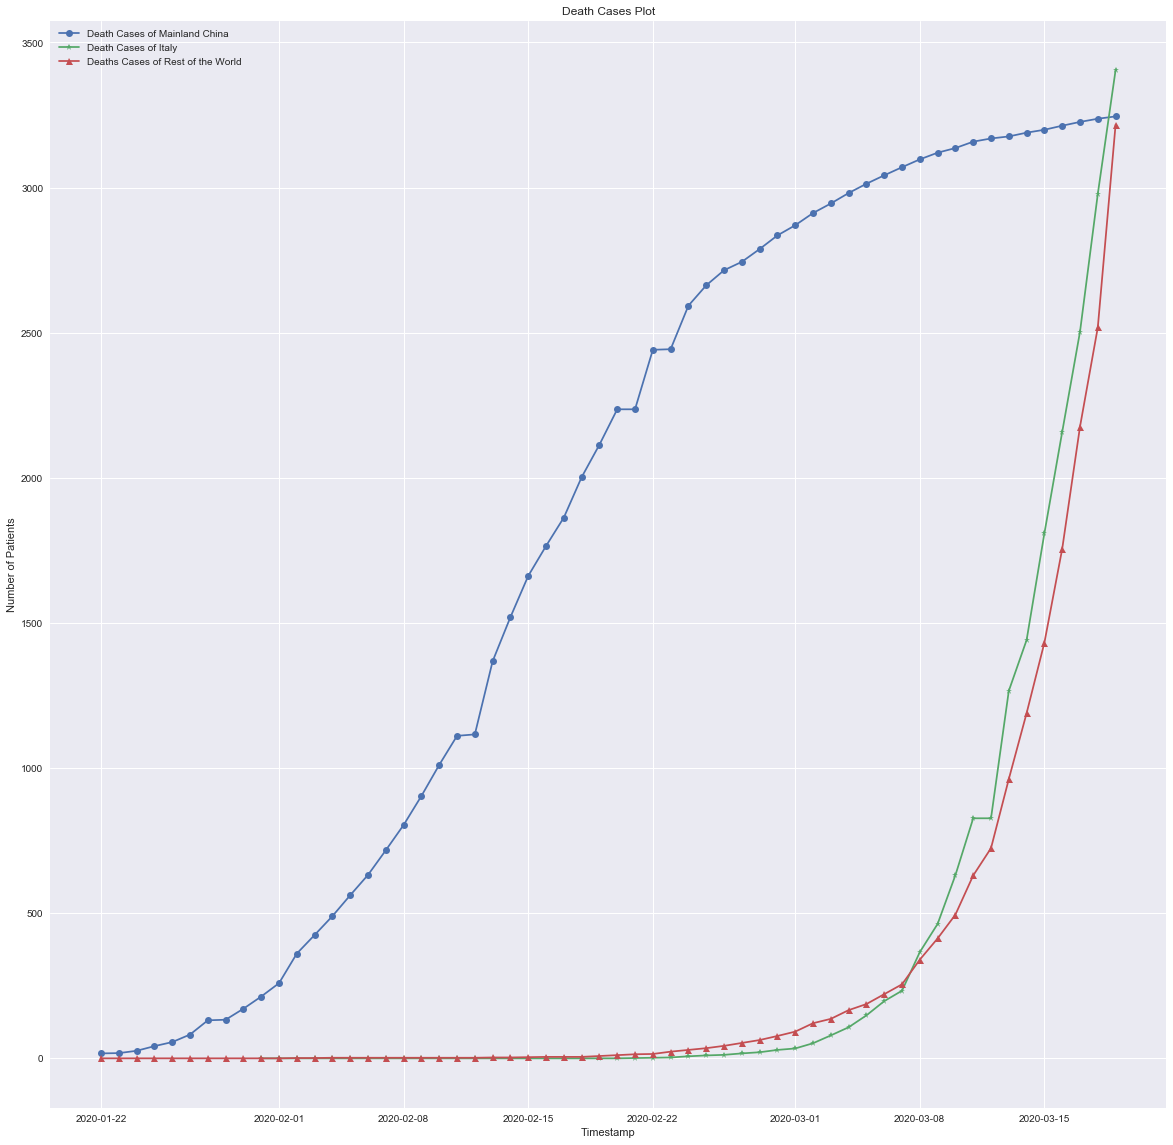

In [127]:
fig, ( ax4) = plt.subplots( 1,figsize=(20,20))
ax4.plot(info_datewise_china["Deaths"],label='Death Cases of Mainland China',marker='o')
ax4.plot(info_datewise_itly["Deaths"],label='Death Cases of Italy',marker='*')
ax4.plot(info_data_of_the_rest_Of_the_world["Deaths"],label="Deaths Cases of Rest of the World",marker='^')
ax4.set_title("Death Cases Plot")
ax4.set_ylabel("Number of Patients")
ax4.set_xlabel("Timestamp")
ax4.legend()

In [128]:
info_datewise_china["Mortality"] = (info_datewise_china["Deaths"]/info_datewise_china["Confirmed"])*100

In [129]:
info_datewise_china

,Confirmed,Recovered,Deaths,Mortality
ObservationDate,,,,
2020-01-22,547.0,28.0,17.0,3.107861
2020-01-23,639.0,30.0,18.0,2.816901
2020-01-24,916.0,36.0,26.0,2.838428
2020-01-25,1399.0,39.0,42.0,3.002144
2020-01-26,2062.0,49.0,56.0,2.715810
2020-01-27,2863.0,58.0,82.0,2.864129
2020-01-28,5494.0,101.0,131.0,2.384419
2020-01-29,6070.0,120.0,133.0,2.191104
2020-01-30,8124.0,135.0,171.0,2.104874


In [130]:
info_datewise_itly["Mortality"]=(info_datewise_itly["Deaths"]/info_datewise_itly["Confirmed"])*100

In [131]:
info_datewise_itly

,Confirmed,Recovered,Deaths,Mortality
ObservationDate,,,,
2020-01-31,2.0,0.0,0.0,0.000000
2020-02-01,2.0,0.0,0.0,0.000000
2020-02-02,2.0,0.0,0.0,0.000000
2020-02-03,2.0,0.0,0.0,0.000000
2020-02-04,2.0,0.0,0.0,0.000000
2020-02-05,2.0,0.0,0.0,0.000000
2020-02-06,2.0,0.0,0.0,0.000000
2020-02-07,3.0,0.0,0.0,0.000000
2020-02-08,3.0,0.0,0.0,0.000000


In [132]:
info_data_of_the_rest_Of_the_world["Mortality"] = (info_data_of_the_rest_Of_the_world["Deaths"]/info_data_of_the_rest_Of_the_world["Confirmed"])*100

In [133]:
info_data_of_the_rest_Of_the_world

,Confirmed,Recovered,Deaths,Mortality
ObservationDate,,,,
2020-01-22,8.0,0.0,0.0,0.000000
2020-01-23,14.0,0.0,0.0,0.000000
2020-01-24,25.0,0.0,0.0,0.000000
2020-01-25,39.0,0.0,0.0,0.000000
2020-01-26,56.0,3.0,0.0,0.000000
2020-01-27,64.0,3.0,0.0,0.000000
2020-01-28,84.0,6.0,0.0,0.000000
2020-01-29,95.0,6.0,0.0,0.000000
2020-01-30,111.0,8.0,0.0,0.000000


## Recovery data

In [134]:
info_datewise_china["Recovery"] = (info_datewise_china["Recovered"]/info_datewise_china["Confirmed"])*100

In [135]:
info_datewise_china

,Confirmed,Recovered,Deaths,Mortality,Recovery
ObservationDate,,,,,
2020-01-22,547.0,28.0,17.0,3.107861,5.118830
2020-01-23,639.0,30.0,18.0,2.816901,4.694836
2020-01-24,916.0,36.0,26.0,2.838428,3.930131
2020-01-25,1399.0,39.0,42.0,3.002144,2.787706
2020-01-26,2062.0,49.0,56.0,2.715810,2.376334
2020-01-27,2863.0,58.0,82.0,2.864129,2.025847
2020-01-28,5494.0,101.0,131.0,2.384419,1.838369
2020-01-29,6070.0,120.0,133.0,2.191104,1.976936
2020-01-30,8124.0,135.0,171.0,2.104874,1.661743


In [136]:
info_datewise_itly["Recovery"] = (info_datewise_itly["Recovered"]/info_datewise_itly["Confirmed"])*100

In [137]:
info_datewise_itly

,Confirmed,Recovered,Deaths,Mortality,Recovery
ObservationDate,,,,,
2020-01-31,2.0,0.0,0.0,0.000000,0.000000
2020-02-01,2.0,0.0,0.0,0.000000,0.000000
2020-02-02,2.0,0.0,0.0,0.000000,0.000000
2020-02-03,2.0,0.0,0.0,0.000000,0.000000
2020-02-04,2.0,0.0,0.0,0.000000,0.000000
2020-02-05,2.0,0.0,0.0,0.000000,0.000000
2020-02-06,2.0,0.0,0.0,0.000000,0.000000
2020-02-07,3.0,0.0,0.0,0.000000,0.000000
2020-02-08,3.0,0.0,0.0,0.000000,0.000000


In [138]:
info_data_of_the_rest_Of_the_world["Recovery"] = (info_data_of_the_rest_Of_the_world["Recovered"]/info_data_of_the_rest_Of_the_world["Confirmed"])*100

In [139]:
info_data_of_the_rest_Of_the_world

,Confirmed,Recovered,Deaths,Mortality,Recovery
ObservationDate,,,,,
2020-01-22,8.0,0.0,0.0,0.000000,0.000000
2020-01-23,14.0,0.0,0.0,0.000000,0.000000
2020-01-24,25.0,0.0,0.0,0.000000,0.000000
2020-01-25,39.0,0.0,0.0,0.000000,0.000000
2020-01-26,56.0,3.0,0.0,0.000000,5.357143
2020-01-27,64.0,3.0,0.0,0.000000,4.687500
2020-01-28,84.0,6.0,0.0,0.000000,7.142857
2020-01-29,95.0,6.0,0.0,0.000000,6.315789
2020-01-30,111.0,8.0,0.0,0.000000,7.207207


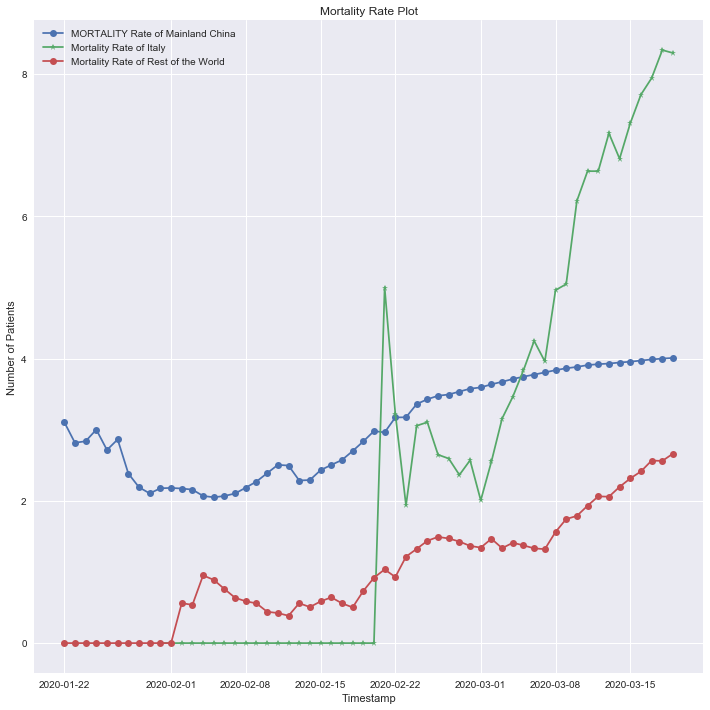

In [140]:
fig, (ax5) = plt.subplots(1,figsize=(12,12))
ax5.plot(info_datewise_china["Mortality"],label="MORTALITY Rate of Mainland China",marker='o')
ax5.plot(info_datewise_itly["Mortality"],label="Mortality Rate of Italy",marker='*')
ax5.plot(info_data_of_the_rest_Of_the_world["Mortality"],label="Mortality Rate of Rest of the World",marker='o')
ax5.set_title("Mortality Rate Plot")
ax5.set_ylabel("Number of Patients")
ax5.set_xlabel("Timestamp")
ax5.legend()

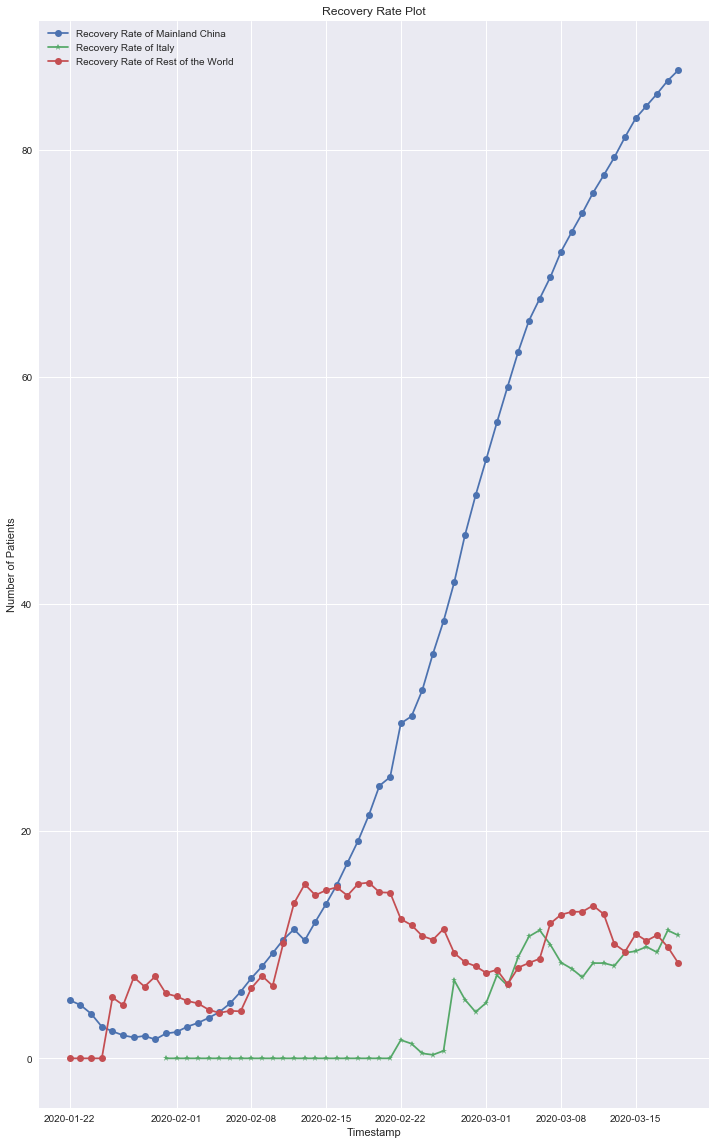

In [141]:
fig, (ax6) = plt.subplots(1,figsize=(12,20))
ax6.plot(info_datewise_china["Recovery"],label="Recovery Rate of Mainland China",marker='o')
ax6.plot(info_datewise_itly["Recovery"],label="Recovery Rate of Italy",marker='*')
ax6.plot(info_data_of_the_rest_Of_the_world["Recovery"],label="Recovery Rate of Rest of the World",marker='o')
ax6.set_title("Recovery Rate Plot")
ax6.set_ylabel("Number of Patients")
ax6.set_xlabel("Timestamp")
ax6.legend()

## calculating the active cases

In [142]:
countrywise

,Confirmed,Recovered,Deaths,Mortality,Recovery
Country/Region,,,,,
Mainland China,80931.0,70430.0,3245.0,4.009588,87.024749
Italy,41035.0,4440.0,3405.0,8.297795,10.820032
Iran,18407.0,5710.0,1284.0,6.975607,31.020807
Spain,17963.0,1107.0,830.0,4.620609,6.162668
Germany,15320.0,113.0,44.0,0.287206,0.737598
...,...,...,...,...,...
Guernsey,0.0,0.0,0.0,NaN,NaN
Jersey,0.0,0.0,0.0,NaN,NaN
Puerto Rico,0.0,0.0,0.0,NaN,NaN


In [143]:
countrywise_data

,Confirmed,Recovered,Deaths
Country/Region,,,
Mainland China,80931.0,70430.0,3245.0
Italy,41035.0,4440.0,3405.0
Iran,18407.0,5710.0,1284.0
Spain,17963.0,1107.0,830.0
Germany,15320.0,113.0,44.0
...,...,...,...
Guernsey,0.0,0.0,0.0
Jersey,0.0,0.0,0.0
Puerto Rico,0.0,0.0,0.0


In [144]:
countrywise_data["Active Cases"] = (countrywise_data["Confirmed"] - countrywise_data["Recovered"]) 

In [145]:
countrywise_data

,Confirmed,Recovered,Deaths,Active Cases
Country/Region,,,,
Mainland China,80931.0,70430.0,3245.0,10501.0
Italy,41035.0,4440.0,3405.0,36595.0
Iran,18407.0,5710.0,1284.0,12697.0
Spain,17963.0,1107.0,830.0,16856.0
Germany,15320.0,113.0,44.0,15207.0
...,...,...,...,...
Guernsey,0.0,0.0,0.0,0.0
Jersey,0.0,0.0,0.0,0.0
Puerto Rico,0.0,0.0,0.0,0.0


In [146]:
top_25_country_active_cases = countrywise_data.sort_values(["Active Cases"],ascending=False).head(25)

In [147]:
top_25_country_active_cases

,Confirmed,Recovered,Deaths,Active Cases
Country/Region,,,,
Italy,41035.0,4440.0,3405.0,36595.0
Spain,17963.0,1107.0,830.0,16856.0
Germany,15320.0,113.0,44.0,15207.0
US,13680.0,108.0,200.0,13572.0
Iran,18407.0,5710.0,1284.0,12697.0
France,10886.0,12.0,243.0,10874.0
Mainland China,80931.0,70430.0,3245.0,10501.0
South Korea,8565.0,1540.0,91.0,7025.0
Switzerland,4075.0,15.0,41.0,4060.0


Text(0.5, 1.0, 'Top 25 Countries with Most Number of Active Cases')

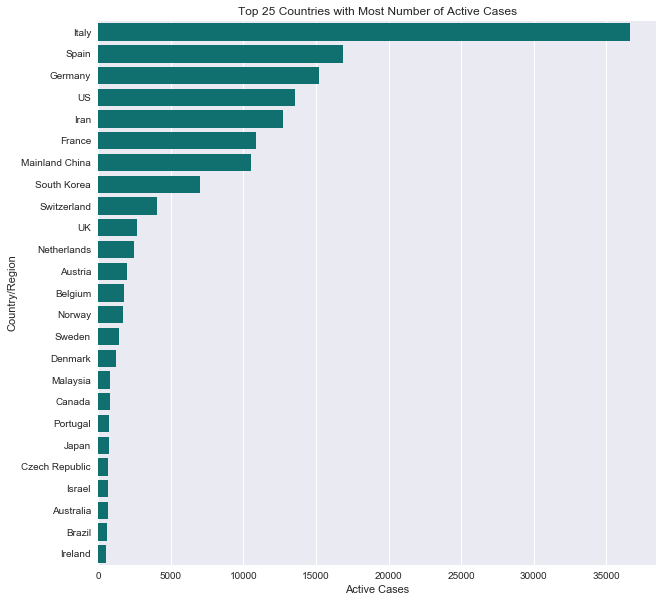

In [148]:
sns.barplot( x = top_25_country_active_cases["Active Cases"] , y = top_25_country_active_cases.index , color="teal")
plt.title("Top 25 Countries with Most Number of Active Cases")

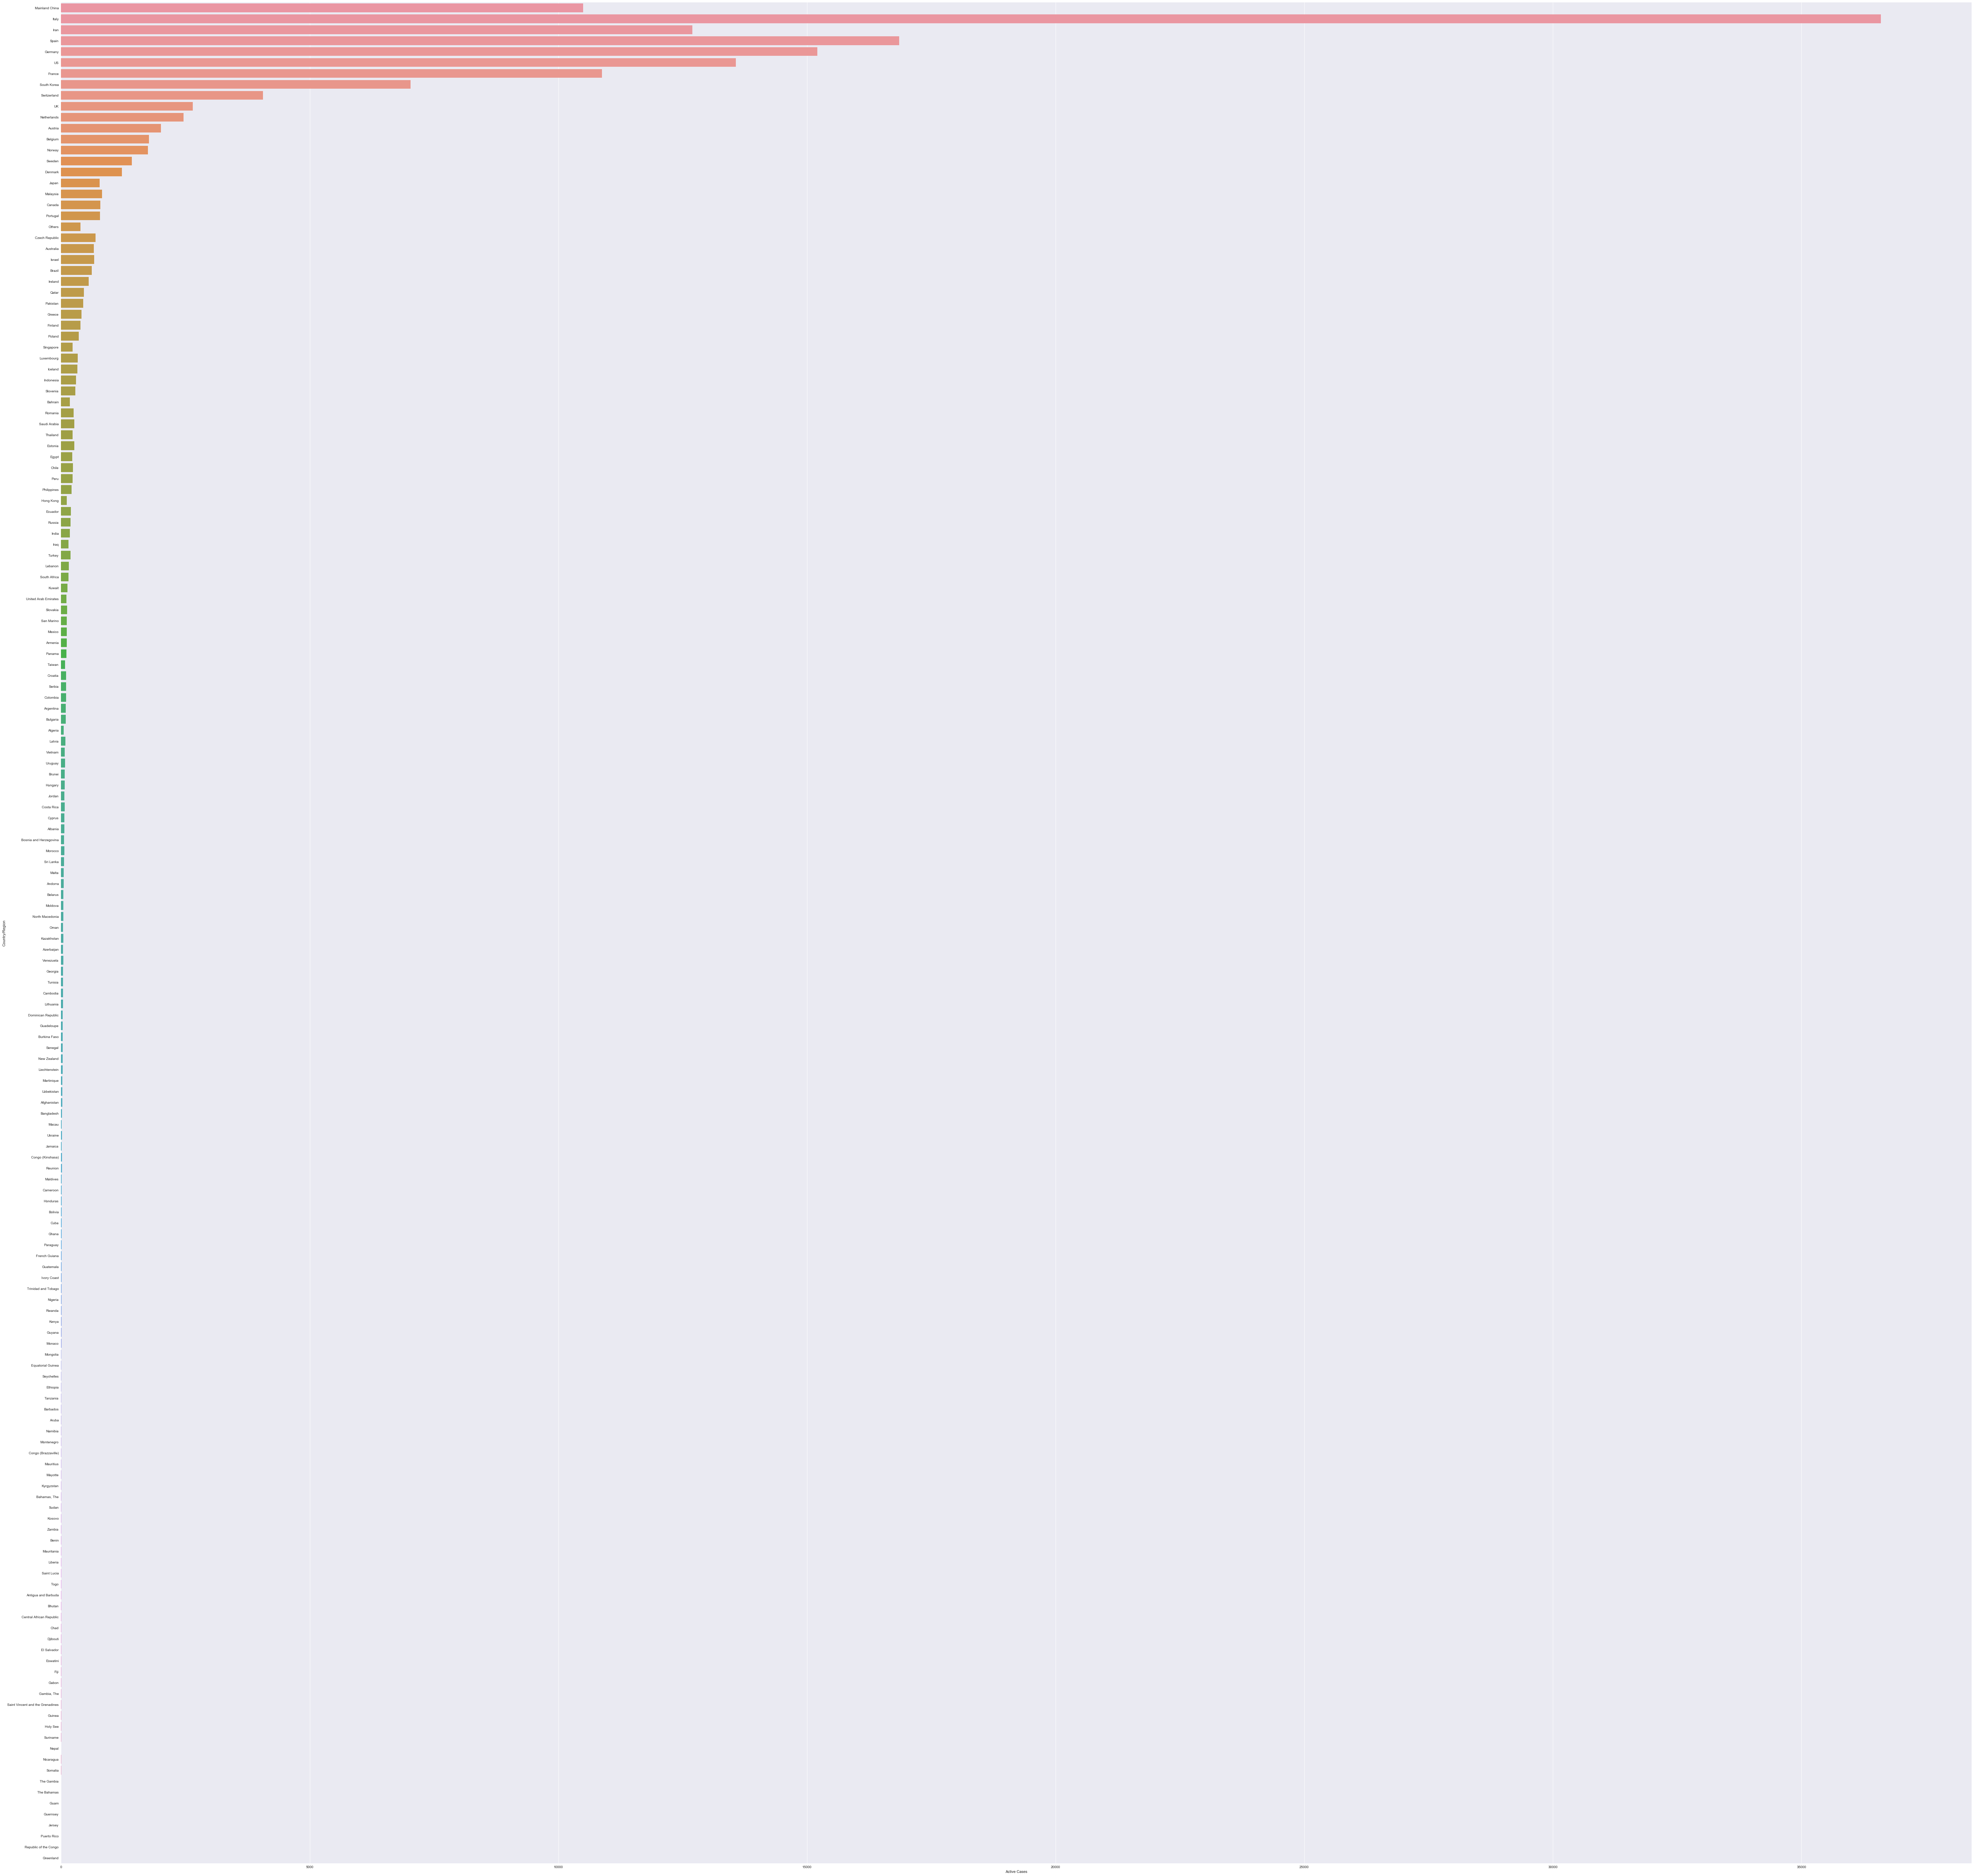

In [149]:
plt.figure(figsize=(100,100))
sns.barplot(countrywise_data["Active Cases"] , countrywise_data.index)


In [150]:
countrywise_data["Survival Probability"] = (1-(countrywise_data["Deaths"]/countrywise_data["Confirmed"]))*100

In [151]:
countrywise_data

,Confirmed,Recovered,Deaths,Active Cases,Survival Probability
Country/Region,,,,,
Mainland China,80931.0,70430.0,3245.0,10501.0,95.990412
Italy,41035.0,4440.0,3405.0,36595.0,91.702205
Iran,18407.0,5710.0,1284.0,12697.0,93.024393
Spain,17963.0,1107.0,830.0,16856.0,95.379391
Germany,15320.0,113.0,44.0,15207.0,99.712794
...,...,...,...,...,...
Guernsey,0.0,0.0,0.0,0.0,NaN
Jersey,0.0,0.0,0.0,0.0,NaN
Puerto Rico,0.0,0.0,0.0,0.0,NaN


In [152]:
countrywise_data.head(10)

,Confirmed,Recovered,Deaths,Active Cases,Survival Probability
Country/Region,,,,,
Mainland China,80931.0,70430.0,3245.0,10501.0,95.990412
Italy,41035.0,4440.0,3405.0,36595.0,91.702205
Iran,18407.0,5710.0,1284.0,12697.0,93.024393
Spain,17963.0,1107.0,830.0,16856.0,95.379391
Germany,15320.0,113.0,44.0,15207.0,99.712794
US,13680.0,108.0,200.0,13572.0,98.538012
France,10886.0,12.0,243.0,10874.0,97.767775
South Korea,8565.0,1540.0,91.0,7025.0,98.937536
Switzerland,4075.0,15.0,41.0,4060.0,98.993865


In [153]:
top_10_survival_country = countrywise_data[countrywise_data["Confirmed"]>1000].sort_values(["Survival Probability"],ascending=False).head(10)

In [154]:
top_10_survival_country

,Confirmed,Recovered,Deaths,Active Cases,Survival Probability
Country/Region,,,,,
Germany,15320.0,113.0,44.0,15207.0,99.712794
Austria,2013.0,9.0,6.0,2004.0,99.701937
Norway,1746.0,1.0,7.0,1745.0,99.599084
Denmark,1225.0,1.0,6.0,1224.0,99.510204
Sweden,1439.0,16.0,11.0,1423.0,99.235580
Switzerland,4075.0,15.0,41.0,4060.0,98.993865
South Korea,8565.0,1540.0,91.0,7025.0,98.937536
Belgium,1795.0,31.0,21.0,1764.0,98.830084
US,13680.0,108.0,200.0,13572.0,98.538012


Text(0.5, 1.0, 'Top 25 Countries with Maximum Survival Probability having more than 1000 Confiremed Cases')

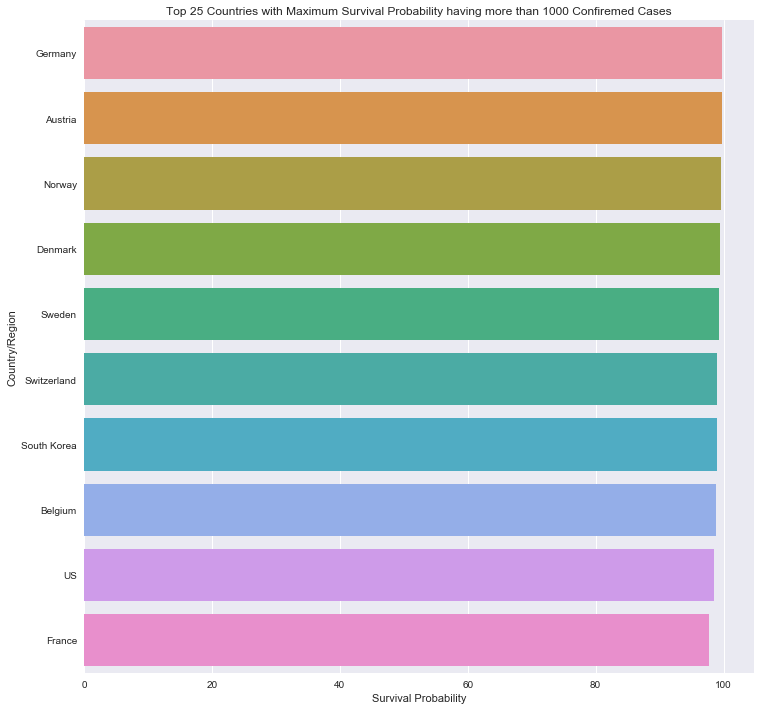

In [155]:
plt.figure(figsize=(12,12))
sns.barplot(x=top_10_survival_country["Survival Probability"],y=top_10_survival_country.index)
plt.title("Top 25 Countries with Maximum Survival Probability having more than 1000 Confiremed Cases")

In [156]:
last_10_survival_countries = countrywise_data[countrywise_data["Confirmed"]>100].sort_values(["Survival Probability"],ascending=True).head(10)

In [157]:
last_10_survival_countries

,Confirmed,Recovered,Deaths,Active Cases,Survival Probability
Country/Region,,,,,
San Marino,119.0,4.0,11.0,115.0,90.756303
Italy,41035.0,4440.0,3405.0,36595.0,91.702205
Indonesia,311.0,11.0,25.0,300.0,91.961415
Philippines,217.0,8.0,17.0,209.0,92.165899
Iran,18407.0,5710.0,1284.0,12697.0,93.024393
Iraq,192.0,43.0,13.0,149.0,93.229167
UK,2716.0,67.0,138.0,2649.0,94.918999
Spain,17963.0,1107.0,830.0,16856.0,95.379391
Mainland China,80931.0,70430.0,3245.0,10501.0,95.990412


Text(0.5, 1.0, 'last_10_survival_countries')

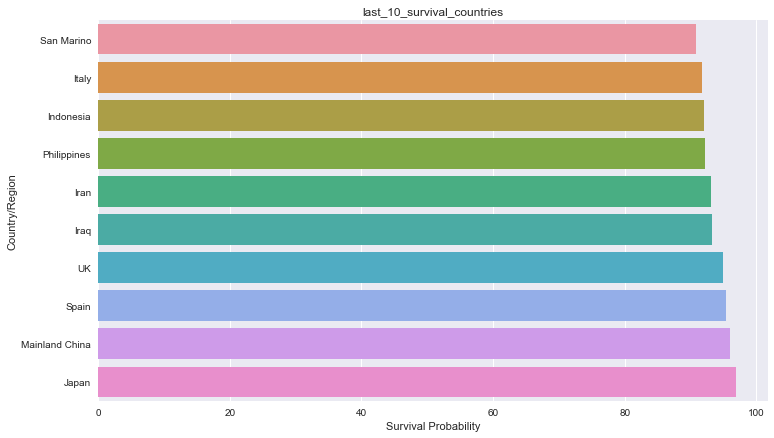

In [158]:
plt.figure(figsize=(12,7))
sns.barplot(x = last_10_survival_countries["Survival Probability"] , y = last_10_survival_countries.index)
plt.title("last_10_survival_countries")

In [159]:
info_datewise

,Confirmed,Recovered,Deaths,Mortality Rate,Recovery Rate
ObservationDate,,,,,
2020-01-22,555.0,28.0,17.0,3.063063,5.045045
2020-01-23,653.0,30.0,18.0,2.756508,4.594181
2020-01-24,941.0,36.0,26.0,2.763018,3.825717
2020-01-25,1438.0,39.0,42.0,2.920723,2.712100
2020-01-26,2118.0,52.0,56.0,2.644004,2.455146
2020-01-27,2927.0,61.0,82.0,2.801503,2.084045
2020-01-28,5578.0,107.0,131.0,2.348512,1.918250
2020-01-29,6165.0,126.0,133.0,2.157340,2.043796
2020-01-30,8235.0,143.0,171.0,2.076503,1.736491


In [164]:
info_datewise["Days Since"] = info_datewise.index - info_datewise.index[0]

In [165]:
info_datewise

,Confirmed,Recovered,Deaths,Mortality Rate,Recovery Rate,Days Since
ObservationDate,,,,,,
2020-01-22,555.0,28.0,17.0,3.063063,5.045045,0 days
2020-01-23,653.0,30.0,18.0,2.756508,4.594181,1 days
2020-01-24,941.0,36.0,26.0,2.763018,3.825717,2 days
2020-01-25,1438.0,39.0,42.0,2.920723,2.712100,3 days
2020-01-26,2118.0,52.0,56.0,2.644004,2.455146,4 days
2020-01-27,2927.0,61.0,82.0,2.801503,2.084045,5 days
2020-01-28,5578.0,107.0,131.0,2.348512,1.918250,6 days
2020-01-29,6165.0,126.0,133.0,2.157340,2.043796,7 days
2020-01-30,8235.0,143.0,171.0,2.076503,1.736491,8 days


In [166]:
info_datewise["Days Since"] = info_datewise["Days Since"].dt.days

In [167]:
info_datewise

,Confirmed,Recovered,Deaths,Mortality Rate,Recovery Rate,Days Since
ObservationDate,,,,,,
2020-01-22,555.0,28.0,17.0,3.063063,5.045045,0
2020-01-23,653.0,30.0,18.0,2.756508,4.594181,1
2020-01-24,941.0,36.0,26.0,2.763018,3.825717,2
2020-01-25,1438.0,39.0,42.0,2.920723,2.712100,3
2020-01-26,2118.0,52.0,56.0,2.644004,2.455146,4
2020-01-27,2927.0,61.0,82.0,2.801503,2.084045,5
2020-01-28,5578.0,107.0,131.0,2.348512,1.918250,6
2020-01-29,6165.0,126.0,133.0,2.157340,2.043796,7
2020-01-30,8235.0,143.0,171.0,2.076503,1.736491,8


In [168]:
x = info_datewise.iloc[:int(info_datewise.shape[0]*0.80)]

In [169]:
x

,Confirmed,Recovered,Deaths,Mortality Rate,Recovery Rate,Days Since
ObservationDate,,,,,,
2020-01-22,555.0,28.0,17.0,3.063063,5.045045,0
2020-01-23,653.0,30.0,18.0,2.756508,4.594181,1
2020-01-24,941.0,36.0,26.0,2.763018,3.825717,2
2020-01-25,1438.0,39.0,42.0,2.920723,2.712100,3
2020-01-26,2118.0,52.0,56.0,2.644004,2.455146,4
2020-01-27,2927.0,61.0,82.0,2.801503,2.084045,5
2020-01-28,5578.0,107.0,131.0,2.348512,1.918250,6
2020-01-29,6165.0,126.0,133.0,2.157340,2.043796,7
2020-01-30,8235.0,143.0,171.0,2.076503,1.736491,8


In [170]:
y = info_datewise.iloc[int(info_datewise.shape[0]*0.80):]

In [171]:
y

,Confirmed,Recovered,Deaths,Mortality Rate,Recovery Rate,Days Since
ObservationDate,,,,,,
2020-03-08,109835.0,60695.0,3803.0,3.462466,55.260163,46
2020-03-09,113582.0,62512.0,3996.0,3.518163,55.036890,47
2020-03-10,118582.0,64404.0,4262.0,3.594137,54.311784,48
2020-03-11,125865.0,67003.0,4615.0,3.666627,53.234021,49
2020-03-12,128343.0,68324.0,4720.0,3.677645,53.235471,50
2020-03-13,145193.0,70251.0,5404.0,3.721943,48.384564,51
2020-03-14,156099.0,72624.0,5819.0,3.727763,46.524321,52
2020-03-15,167447.0,76034.0,6440.0,3.845993,45.407801,53
2020-03-16,181546.0,78088.0,7126.0,3.925176,43.012790,54


In [167]:
model_s = []

In [168]:
model_s

[]

In [169]:
linear_reg = LinearRegression()

In [170]:
linear_reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [171]:
linear_reg = LinearRegression(normalize=True)

In [172]:
linear_reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [173]:
linear_reg.fit(np.array(x["Days Since"]).reshape(-1,1),np.array(x["Confirmed"]).reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [174]:
prediction_cv19 = linear_reg.predict(np.array(y["Days Since"]).reshape(-1,1))

In [175]:
prediction_cv19

array([[111601.9826087 ],
       [114146.87363552],
       [116691.76466235],
       [119236.65568918],
       [121781.546716  ],
       [124326.43774283],
       [126871.32876966],
       [129416.21979648],
       [131961.11082331],
       [134506.00185014],
       [137050.89287697],
       [139595.78390379]])

In [176]:
model_s.append( np.sqrt ( mean_squared_error(y["Confirmed"] , prediction_cv19)))

In [177]:
np.sqrt(mean_squared_error(y["Confirmed"],prediction_cv19))

46467.891267396

In [181]:
prediction_linreg = linear_reg.predict(np.array(info_datewise["Days Since"]).reshape(-1,1))

In [182]:
prediction_linreg

array([[ -5463.00462535],
       [ -2918.11359852],
       [  -373.22257169],
       [  2171.66845513],
       [  4716.55948196],
       [  7261.45050879],
       [  9806.34153562],
       [ 12351.23256244],
       [ 14896.12358927],
       [ 17441.0146161 ],
       [ 19985.90564292],
       [ 22530.79666975],
       [ 25075.68769658],
       [ 27620.5787234 ],
       [ 30165.46975023],
       [ 32710.36077706],
       [ 35255.25180389],
       [ 37800.14283071],
       [ 40345.03385754],
       [ 42889.92488437],
       [ 45434.81591119],
       [ 47979.70693802],
       [ 50524.59796485],
       [ 53069.48899167],
       [ 55614.3800185 ],
       [ 58159.27104533],
       [ 60704.16207216],
       [ 63249.05309898],
       [ 65793.94412581],
       [ 68338.83515264],
       [ 70883.72617946],
       [ 73428.61720629],
       [ 75973.50823312],
       [ 78518.39925994],
       [ 81063.29028677],
       [ 83608.1813136 ],
       [ 86153.07234043],
       [ 88697.96336725],
       [ 912

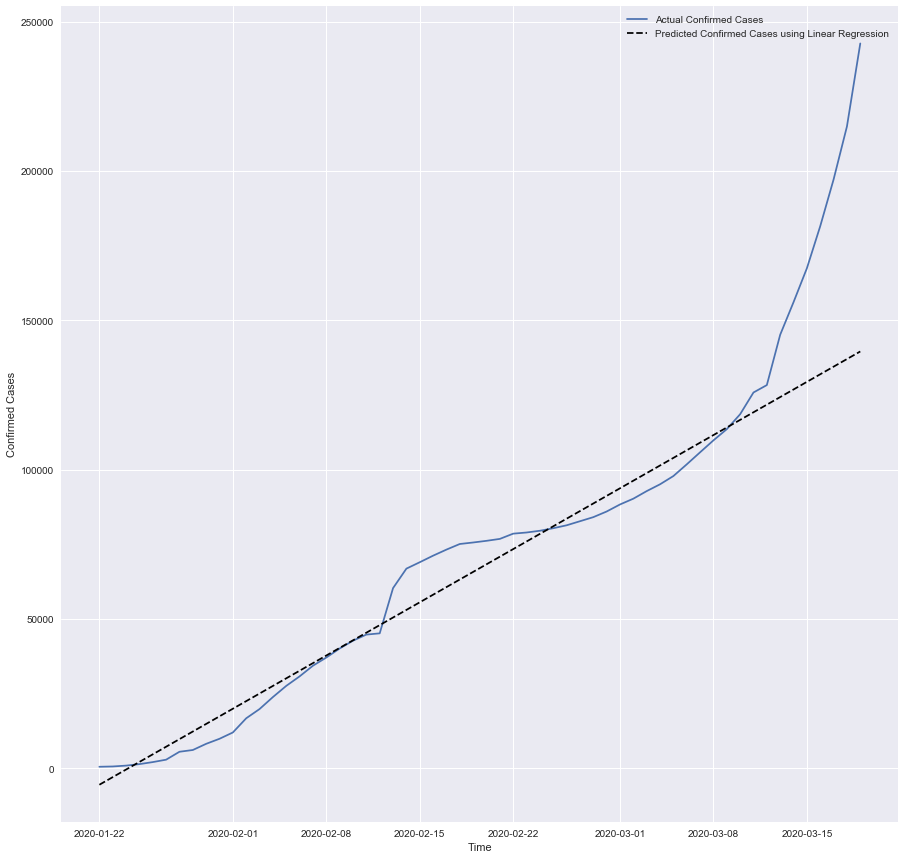

In [186]:
plt.figure(figsize=(15,15))
prediction_linreg = linear_reg.predict(np.array(info_datewise["Days Since"]).reshape(-1,1))


plt.plot(info_datewise["Confirmed"],label="Actual Confirmed Cases")
plt.plot(info_datewise.index , prediction_linreg , linestyle='--' , label="Predicted Confirmed Cases using Linear Regression",color='black')
plt.xlabel('Time')
plt.ylabel('Confirmed Cases')
plt.legend()

# Support Vector Machine ModelRegressor

In [172]:
s_v_m = SVR(degree=3)

In [173]:
s_v_m

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [174]:
param_svm = {'kernel':['linear','rbf','poly'],
          'C':[0.1,1,0.01],
          'gamma':[0.1,1,0.01],
          'epsilon':[0.1,1,0.01]}

In [175]:
param_svm

{'kernel': ['linear', 'rbf', 'poly'],
 'C': [0.1, 1, 0.01],
 'gamma': [0.1, 1, 0.01],
 'epsilon': [0.1, 1, 0.01]}

In [176]:
svm_GSCV = GridSearchCV(estimator = s_v_m , param_grid = param_svm , cv=3)

In [177]:
svm_GSCV

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 0.01], 'epsilon': [0.1, 1, 0.01],
                         'gamma': [0.1, 1, 0.01],
                         'kernel': ['linear', 'rbf', 'poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

## best estemeter

In [178]:
svm_GSCV.fit(np.array(x["Days Since"]).reshape(-1,1) , np.array(x["Confirmed"]).reshape(-1,1))

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 0.01], 'epsilon': [0.1, 1, 0.01],
                         'gamma': [0.1, 1, 0.01],
                         'kernel': ['linear', 'rbf', 'poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [179]:
svm_GSCV.best_estimator_

SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.01, gamma=0.01,
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [180]:
prediction_svm_cv19 = svm_GSCV.best_estimator_.predict(np.array(y["Days Since"]).reshape(-1,1))

In [181]:
prediction_svm_cv19

array([110773.70665068, 115564.07010255, 120562.67811946, 125773.96143684,
       131202.35079011, 136852.27691471, 142728.17054605, 148834.46241956,
       155175.58327068, 161755.96383482, 168580.03484742, 175652.22704389])

In [183]:
model_scores2 = []

In [184]:
model_scores2.append(np.sqrt(mean_squared_error(y["Confirmed"],prediction_svm_cv19)))

In [185]:
np.sqrt(mean_squared_error(y["Confirmed"],prediction_svm_cv19))

27696.53675537194

In [186]:
prediction_svm_actital = svm_GSCV.best_estimator_.predict(np.array(info_datewise["Days Since"]).reshape(-1,1))

In [187]:
prediction_svm_actital

array([ 38895.36273963,  38896.10119553,  38901.27038686,  38915.30104905,
        38942.62391751,  38987.66972768,  39054.86921498,  39148.65311484,
        39273.45216268,  39433.69709394,  39633.81864403,  39878.24754839,
        40171.41454244,  40517.7503616 ,  40921.68574131,  41387.65141699,
        41920.07812407,  42523.39659796,  43202.03757411,  43960.43178793,
        44803.00997486,  45734.20287031,  46758.44120972,  47880.15572851,
        49103.77716211,  50433.73624594,  51874.46371543,  53430.39030601,
        55105.9467531 ,  56905.56379213,  58833.67215853,  60894.70258772,
        63093.08581513,  65433.25257619,  67919.63360632,  70556.65964094,
        73348.76141549,  76300.3696654 ,  79415.91512608,  82699.82853296,
        86156.54062148,  89790.48212705,  93606.0837851 ,  97607.77633107,
       101799.99050037, 106187.15702843, 110773.70665068, 115564.07010255,
       120562.67811946, 125773.96143684, 131202.35079011, 136852.27691471,
       142728.17054605, 1

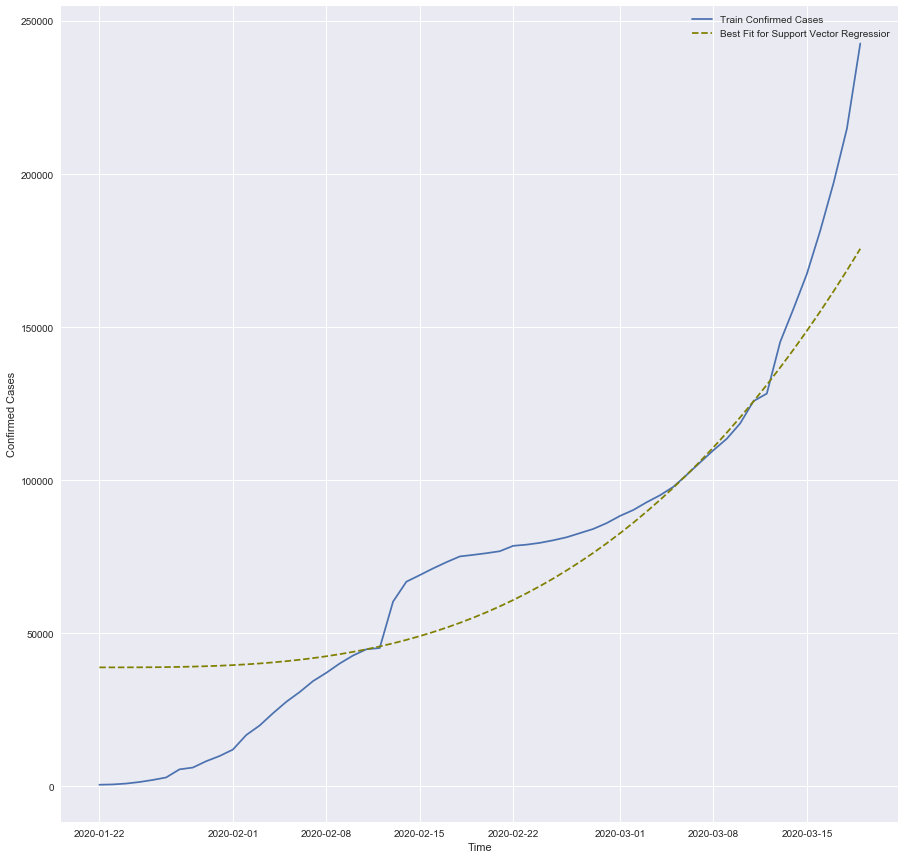

In [189]:
plt.figure(figsize=(15,15))

plt.plot(info_datewise["Confirmed"],label="Train Confirmed Cases")
plt.plot(info_datewise.index , prediction_svm_actital , linestyle='--',label="Best Fit for Support Vector Regressior",color='olive')
plt.xlabel('Time')
plt.ylabel('Confirmed Cases')
plt.legend()

In [190]:
new_date=[]
new_prediction_lr=[]
new_prediction_svm=[]

In [201]:
for i in range(1,20):
    new_date.append(info_datewise.index[-1]+timedelta(days=i))
    #new_prediction_lr.append(lin_reg.predict(np.array(52+i).reshape(-1,1))[0][0])
    new_prediction_svm.append(svm_GSCV.best_estimator_.predict(np.array(52+i).reshape(-1,1))[0])

In [202]:
Both_models_predictions = pd.DataFrame(zip(new_date,new_prediction_svm),columns=["Dates","SVM Prediction"])

In [203]:
Both_models_predictions.head()

,Dates,SVM Prediction
0,2020-03-20,148834.462420
1,2020-03-21,155175.583271
2,2020-03-22,161755.963835
3,2020-03-23,168580.034847
4,2020-03-24,175652.227044


In [204]:
Both_models_predictions

,Dates,SVM Prediction
0,2020-03-20,148834.462420
1,2020-03-21,155175.583271
2,2020-03-22,161755.963835
3,2020-03-23,168580.034847
4,2020-03-24,175652.227044
...,...,...
130,2020-04-03,260995.575916
131,2020-04-04,271089.529673
132,2020-04-05,281484.773439
133,2020-04-06,292185.737950
